##1) Import all necessary libraries

In [248]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [249]:
import warnings
warnings.filterwarnings('ignore')

##2) Read in all the necessary files

In [250]:
#Please note I have uploaded the files on the side panel 'Table of Contents'>'Files'>'Upload to session storage'
application_df = pd.read_csv('/content/application_data.csv')
previous_df = pd.read_csv('/content/previous_application.csv')
columns_description_df = pd.read_csv('/content/columns_description.csv')

##3) Exploring the data

In [251]:
#Checking shape and first few rows of application data set and previous application dataset:
print('Application data shape:', application_df.shape)
print('Previous application data shape:', previous_df.shape)


Application data shape: (307511, 122)
Previous application data shape: (1670214, 37)


In [252]:
#Checking the info for both Application and Previous Application dataset:
print("Application data info:")
print(application_df.info())
print("\nPrevious application data info:")
print(previous_df.info())

Application data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None

Previous application data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_

In [253]:
#Since the above code section does not show the application_df in detail due to high no. of columns,
#so here, the info is displayed in detail by splitting the data columns using iloc to view
print(application_df.iloc[:, 0:100].info())
print(application_df.iloc[:, 100:122].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 100 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [254]:
#Checking first few rows and columns of Application Dataset:
application_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [255]:
#Checking first few rows of Previous Application dataset:
previous_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

##4) Finding Missing Values

In [256]:
# Missing values in application data
missing_app = application_df.isnull().sum().sort_values(ascending=False)
missing_app = missing_app[missing_app > 0]
print("Missing values in Application Data:\n", missing_app)

Missing values in Application Data:
 COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64


In [257]:
# Percentage
missing_percent = (missing_app / application_df.shape[0]) * 100
print("\nMissing Percentage of the top 60 sorted columns:\n", missing_percent.head(60))


Missing Percentage of the top 60 sorted columns:
 COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG         

##5) Dropping missing values:
Here, it is clear that a lot of the columns have missing values of more than 40%. It is not possible to fill these missing values with median or mean as it would cause inaccuracy in the data.

These columns are also data on the living area, surrounding environment, type of building, structure, floor planning, etc. These data seem to be irrelevant to the main aim of this case study. Therefore, these columns will be ignored.

We can either choose to drop these columns or simply copy the relevant data onto a new dataframe. Here, to keep track of variables and maintain consistency, I have chosen to drop the columns from the original dataframe.

In [258]:
# Drop columns with too many missing i.e., missing more than 40% of data:
drop_cols = missing_percent[missing_percent >= 40].index
application_df.drop(columns=drop_cols, inplace=True)
print("\nDropped Columns:", drop_cols)


Dropped Columns: Index(['COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_MODE', 'FLOORSMIN_MODE',
       'FLOORSMIN_AVG', 'FLOORSMIN_MEDI', 'YEARS_BUILD_AVG',
       'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'OWN_CAR_AGE', 'LANDAREA_MEDI',
       'LANDAREA_AVG', 'LANDAREA_MODE', 'BASEMENTAREA_MODE',
       'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'EXT_SOURCE_1',
       'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE',
       'WALLSMATERIAL_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MEDI',
       'APARTMENTS_MODE', 'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'ENTRANCES_AVG',
       'LIVINGAREA_AVG', 'LIVINGAREA_MEDI', 'LIVINGAREA_MODE',
       'HOUSETYPE_MODE', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI',
       'YEARS_BEGI

In [259]:
new_missing = application_df.isnull().sum().sort_values(ascending=False)
new_missing = new_missing[new_missing > 0]
print("Missing values in Application Data:\n", new_missing)

Missing values in Application Data:
 OCCUPATION_TYPE               96391
EXT_SOURCE_3                  60965
AMT_REQ_CREDIT_BUREAU_YEAR    41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
NAME_TYPE_SUITE                1292
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
EXT_SOURCE_2                    660
AMT_GOODS_PRICE                 278
AMT_ANNUITY                      12
CNT_FAM_MEMBERS                   2
DAYS_LAST_PHONE_CHANGE            1
dtype: int64


In [260]:
new_missing_percent = (new_missing / application_df.shape[0]) * 100
print("\nUpdated Missing Percentage:\n", new_missing_percent)


Updated Missing Percentage:
 OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
NAME_TYPE_SUITE                0.420148
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
dtype: float64


##6) Dealing with remaining columns having less than 40% of missing values:

###6.1) OCCUPATION_TYPE

In [261]:
application_df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

The Occupation Type has more than 31% of missing values. It is a categorical variable which tells us the occupation type of the different applicants. Although this can be filled with mode, this would make more than 31% of missing values as labourers and might cause some discrepancies. To avoid this, it is decided to fill the missing values in OCCUPATION_TYPE as 'Unknown'

In [262]:
application_df['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)
application_df.OCCUPATION_TYPE.isnull().sum()

np.int64(0)

###6.2) EXT_SOURCE_3
The next variable is the EXT_SOURCE_3 which has about 19% of missing data. This data represents normalized external credit scores possibly given by external agencies about the applicants.

Here, we will first view the distribution of the data and find its mean and median values.

<Axes: ylabel='Frequency'>

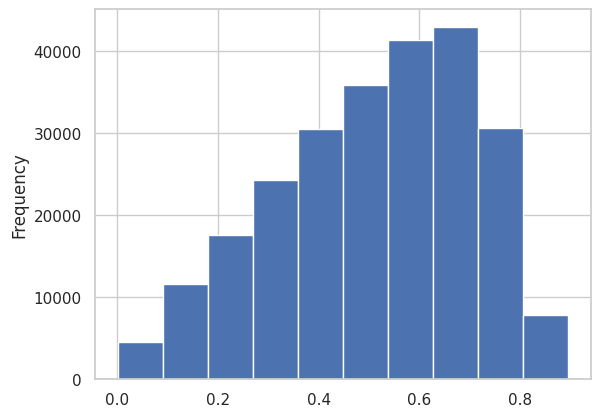

In [263]:
#plotting the histogram to understand the distribution of data:
application_df.EXT_SOURCE_3.plot.hist()

In [264]:
#Taking the mean and median of EXT_SOURCE_3
print("Mean of EXT_SOURCE_3:", application_df.EXT_SOURCE_3.mean())
print("Median of EXT_SOURCE_3", application_df.EXT_SOURCE_3.median())

Mean of EXT_SOURCE_3: 0.5108529061799658
Median of EXT_SOURCE_3 0.5352762504724826


Since this data represents the credit worthiness of an applicant, dropping this column would negatively affect the analysis. This data may be one of the most predictive variables for a loan default, and therefore iks valuable to keep them. Missing values in this data column might likely be because the external agency did not return a credit score. In order to maintain consistency and avoid losing a signal, the best thing to do is to fill the missing values with the median , thereby retaining the central tendency without distorting the distribution.
(The difference between the mean and the median is not very high, therefore median can be used here.)

In [265]:
application_df.EXT_SOURCE_3.fillna(application_df.EXT_SOURCE_3.median(), inplace = True)

<Axes: ylabel='Frequency'>

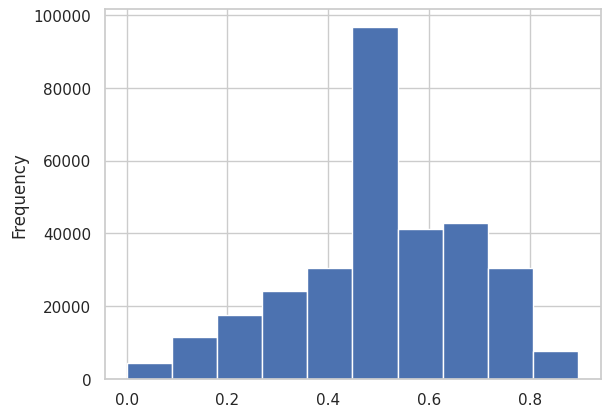

In [266]:
application_df.EXT_SOURCE_3.plot.hist()


Note: Imputing EXT_SOURCE_3 with the median creates a visible spike at the median value distribution. This is a know side effect of filling missing values with a constant. The business trade off is that keeping this predictive variable outweighs the slight distortion in shape.


In [267]:
print("Mean of EXT_SOURCE_3:", application_df.EXT_SOURCE_3.mean())
print("Median of EXT_SOURCE_3", application_df.EXT_SOURCE_3.median())

Mean of EXT_SOURCE_3: 0.5156949091808121
Median of EXT_SOURCE_3 0.5352762504724826


###6.3) AMT_REQ_CREDIT_BUREAU*
AMT_REQ_CREDIT_BUREAU_YEAR

AMT_REQ_CREDIT_BUREAU_QRT     

AMT_REQ_CREDIT_BUREAU_HOUR    

AMT_REQ_CREDIT_BUREAU_MON     

AMT_REQ_CREDIT_BUREAU_WEEK    

AMT_REQ_CREDIT_BUREAU_DAY

The mising values in these columns likely mean that no credit checks were made for that time period. Also, when we check the distribution for each of these columns, most of them have 0 values and their mode is also 0.

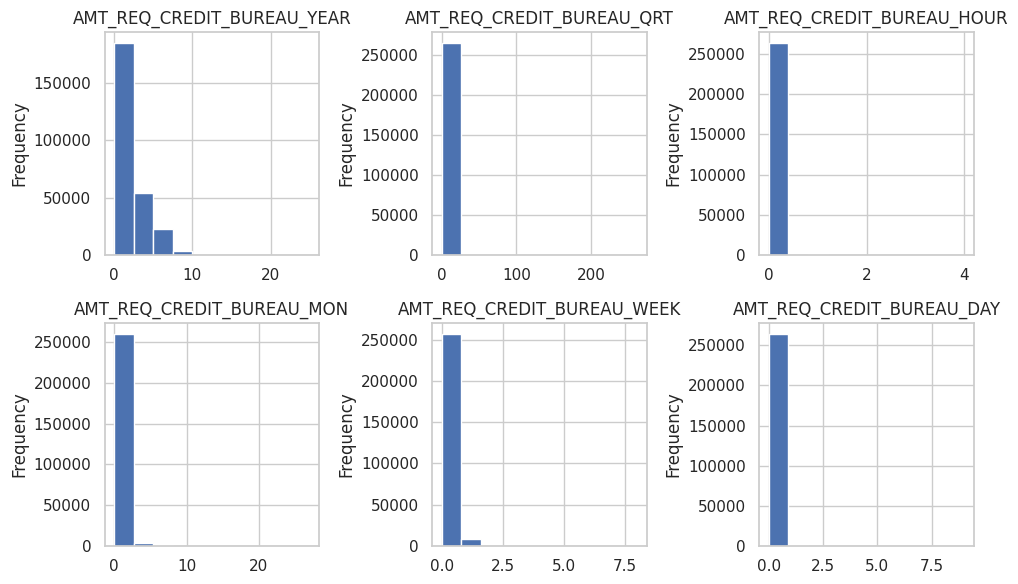

In [268]:
plt.figure(figsize= (10,6))

plt.subplot(2,3,1)
application_df.AMT_REQ_CREDIT_BUREAU_YEAR.plot.hist()
plt.title('AMT_REQ_CREDIT_BUREAU_YEAR')

plt.subplot(2,3,2)
application_df.AMT_REQ_CREDIT_BUREAU_QRT.plot.hist()
plt.title('AMT_REQ_CREDIT_BUREAU_QRT')

plt.subplot(2,3,3)
application_df.AMT_REQ_CREDIT_BUREAU_HOUR.plot.hist()
plt.title('AMT_REQ_CREDIT_BUREAU_HOUR')

plt.subplot(2,3,4)
application_df.AMT_REQ_CREDIT_BUREAU_MON.plot.hist()
plt.title('AMT_REQ_CREDIT_BUREAU_MON')

plt.subplot(2,3,5)
application_df.AMT_REQ_CREDIT_BUREAU_WEEK.plot.hist()
plt.title('AMT_REQ_CREDIT_BUREAU_WEEK')

plt.subplot(2,3,6)
application_df.AMT_REQ_CREDIT_BUREAU_DAY.plot.hist()
plt.title('AMT_REQ_CREDIT_BUREAU_DAY')

plt.tight_layout()

In [269]:
#Computing mode for AMT_REQ_CREDIT_BUREAU_YEAR
application_df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Computing mode for AMT_REQ_CREDIT_BUREAU_YEAR, clearly shows us it is 0, while the rest of the plots show little to no variation. Therefore keeping the missing values as 0 is appropriate.




In [270]:
bureau_cols = [col for col in application_df.columns if 'AMT_REQ_CREDIT_BUREAU' in col]

for col in bureau_cols:
  application_df[col].fillna(0, inplace = True)

In [271]:
for col in bureau_cols:
  print(application_df[col].isnull().sum())

0
0
0
0
0
0


###6.4) NAME_TYPE_SUITE

This column indicates who accompanied the client at the time of application, whether a family member, friend, unaccompanied, etc. This column has very small missing values and so is filled with mode to retain consistency in categorical data

In [272]:
print('Value counts of NAME_TYPE_SUITE', application_df['NAME_TYPE_SUITE'].value_counts())
print('Mode of NAME_TYPE_SUITE', application_df['NAME_TYPE_SUITE'].mode())

Value counts of NAME_TYPE_SUITE NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
Mode of NAME_TYPE_SUITE 0    Unaccompanied
Name: NAME_TYPE_SUITE, dtype: object


In [273]:
application_df['NAME_TYPE_SUITE'].fillna(application_df['NAME_TYPE_SUITE'].mode()[0], inplace=True)


In [274]:
application_df['NAME_TYPE_SUITE'].isnull().sum()

np.int64(0)

###6.5) SOCIAL_CIRCLE

DEF_30_CNT_SOCIAL_CIRCLE

OBS_30_CNT_SOCIAL_CIRCLE

OBS_60_CNT_SOCIAL_CIRCLE

DEF_60_CNT_SOCIAL_CIRCLE

These columns represent how many people in the applicant's social circle defaulted or were observed defaulting.

Missing _SOCIAL_CIRCLE counts likely indicate no defaults were observed/reported. Filled with 0 to retain numeric integrity.

In [275]:
social_cols = [col for col in application_df.columns if 'SOCIAL_CIRCLE' in col]

for col in social_cols:
  print(application_df[col])

0         2.0
1         1.0
2         0.0
3         2.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    6.0
307509    0.0
307510    0.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64
0         2.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64
0         2.0
1         1.0
2         0.0
3         2.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    6.0
307509    0.0
307510    0.0
Name: OBS_60_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64
0         2.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
307506    0.0
307507    0.0
307508    0.0
307509    0.0
307510    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, Length: 307511, dtype: float64


In [276]:
for col in social_cols:
    application_df[col].fillna(0, inplace=True)

###6.6) AMT_GOODS_PRICE

This column represents the price of the goods for which the loan was taken. Since the number of missing values in this column is very small, therefore the missing values can be imputed by the median.

This variable is also right-skewed with possible high-value outliers. Using the median instead of the mean for imputation avoids biasing the typical goods price upward and keeps the central tendency more representative of the majority of customers.

In [277]:
print('Null values in AMT_GOODS_PRICE:', application_df.AMT_GOODS_PRICE.isnull().sum())
print("Mean of AMT_GOODS_PRICE:", application_df.AMT_GOODS_PRICE.mean())
print("Median of AMT_GOODS_PRICE:", application_df.AMT_GOODS_PRICE.median())

Null values in AMT_GOODS_PRICE: 278
Mean of AMT_GOODS_PRICE: 538396.2074288895
Median of AMT_GOODS_PRICE: 450000.0


In [278]:
application_df['AMT_GOODS_PRICE'].fillna(application_df['AMT_GOODS_PRICE'].median(), inplace=True)

In [279]:
application_df['AMT_GOODS_PRICE'].isnull().sum()

np.int64(0)

6.7) AMT_ANNUITY
Monthly annuity amount to be paid, or the loan repayment amount. Since the number of missing values is very small, this column can be imputed with the median.

For AMT_ANNUITY, the median is slightly higher than the mean, indicating a mild left-skew with small outlier loans. To avoid underestimating repayment amounts for missing values, the missing values are filled with the median, which better represents a typical borrower's annuity obligation.




In [280]:
print('Null values of AMT_ANNUITY:', application_df.AMT_ANNUITY.isnull().sum())
print("Mean of AMT_ANNUITY:", application_df.AMT_ANNUITY.mean())
print("Median of AMT_ANNUITY:", application_df.AMT_ANNUITY.median())

Null values of AMT_ANNUITY: 12
Mean of AMT_ANNUITY: 27108.573909183444
Median of AMT_ANNUITY: 24903.0


In [281]:
application_df['AMT_ANNUITY'].fillna(application_df['AMT_ANNUITY'].median(), inplace = True)

In [282]:
application_df['AMT_ANNUITY'].isnull().sum()

np.int64(0)

###6.8) CNT_FAM_MEMBERS

This represents the number of family members of the applicant. The missing values here are a tiny percentage and so can be filled with the median.

In [283]:
print('Null Values of CNT_FAM_MEMBERS:', application_df.CNT_FAM_MEMBERS.isnull().sum())
print("Mean of CNT_FAM_MEMBERS:", application_df.CNT_FAM_MEMBERS.mean())
print("Median of CNT_FAM_MEMBERS:", application_df.CNT_FAM_MEMBERS.median())

Null Values of CNT_FAM_MEMBERS: 2
Mean of CNT_FAM_MEMBERS: 2.152665450442101
Median of CNT_FAM_MEMBERS: 2.0


In [284]:
application_df['CNT_FAM_MEMBERS'].fillna(application_df['CNT_FAM_MEMBERS'].median(), inplace=True)

In [285]:
application_df['CNT_FAM_MEMBERS'].isnull().sum()

np.int64(0)

###6.9) DAYS_LAST_PHONE_CHANGE

This column represents the days since the last phone change. Since it has a very small number of missing values, it can be imputed using the median.

Note: In this dataset, time-based variables like DAYS_LAST_PHONE_CHANGE use negative values to represent days before the application date. This is a standard convention. Missing values are filled with the median, which keeps the time context consistent.

In [286]:
print('Null values of DAYS_LAST_PHONE_CHANGE', application_df.DAYS_LAST_PHONE_CHANGE.isnull().sum())
print("Mean of DAYS_LAST_PHONE_CHANGE:", application_df.DAYS_LAST_PHONE_CHANGE.mean())
print("Median of DAYS_LAST_PHONE_CHANGE:", application_df.DAYS_LAST_PHONE_CHANGE.median())

Null values of DAYS_LAST_PHONE_CHANGE 1
Mean of DAYS_LAST_PHONE_CHANGE: -962.8587883320868
Median of DAYS_LAST_PHONE_CHANGE: -757.0


In [287]:
application_df['DAYS_LAST_PHONE_CHANGE'].fillna(application_df['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)


In [288]:
application_df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

np.int64(0)

###6.10) EXT_SOURCE_2:

Just like EXT_SOURCE_3, EXT_SOURCE_2 is also a normalized external credit scores possibly given by external agencies about the applicants.

Since this data represents the credit worthiness of an applicant, dropping this column would negatively affect the analysis. This data may be one of the most predictive variables for a loan default, and therefore iks valuable to keep them. Missing values in this data column might likely be because the external agency did not return a credit score. In order to maintain consistency and avoid losing a signal, the best thing to do is to fill the missing values with the median , thereby retaining the central tendency without distorting the distribution. (The difference between the mean and the median is not very high, therefore median can be used here.)

In [289]:
print('Null values of EXT_SOURCE_2:', application_df.EXT_SOURCE_2.isnull().sum())
print("Mean of EXT_SOURCE_2:", application_df.EXT_SOURCE_2.mean())
print("Median of EXT_SOURCE_2:", application_df.EXT_SOURCE_2.median())

Null values of EXT_SOURCE_2: 660
Mean of EXT_SOURCE_2: 0.5143926741308462
Median of EXT_SOURCE_2: 0.5659614260608526


In [290]:
application_df['EXT_SOURCE_2'].fillna(application_df['EXT_SOURCE_2'].median(), inplace=True)

In [291]:
application_df['EXT_SOURCE_2'].isnull().sum()

np.int64(0)

In [292]:
#Checking all null values = 0
application_df.isnull().sum().sort_values(ascending=False).head(10)


SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
FLAG_OWN_REALTY       0
CNT_CHILDREN          0
AMT_INCOME_TOTAL      0
AMT_CREDIT            0
AMT_ANNUITY           0
dtype: int64

##7) Checking for outliers/Univariate Numerical Analysis

For this, key numeric variables were selected for checking outliers based on their direct relevance to credit risk and their potential to contain extreme or incorrect values. The columns used for this are:

a) AMT_INCOME_TOTAL: Larger income might cause possible entry error or valid HNI.

b)AMT_CREDIT:	Very large loan can impact portfolio risk.

c)AMT_ANNUITY: Odd payments indicate odd loan structure.

d)AMT_GOODS_PRICE:	Extreme item price may indicate possible mis-entry.

e)CNT_CHILDREN:	E.g., 19 kids may indicate possible data entry issue.

f)CNT_FAM_MEMBERS:	Same as children, consistency check.

g)DAYS_BIRTH:	Extreme age might indicate invalid min/max.

h)DAYS_EMPLOYED:	Common fake placeholder such as 365243 means “not employed”

i)EXT_SOURCE_2, 3:	Should be 0-1. Anything outside this is suspicious.

*Note: EXT_SOURCE_1 is not included in this since it was dropped for columns having more than 40% of missing values*

In [293]:
outlier_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'DAYS_BIRTH',
    'DAYS_EMPLOYED',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]


 Checking column: AMT_INCOME_TOTAL:
count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64
Q1: 112500.0, Q3: 202500.0, IQR: 90000.0
Lower bound: -22500.0, Upper bound: 337500.0
Number of values below lower bound: 0
Number of values above upper bound: 14035


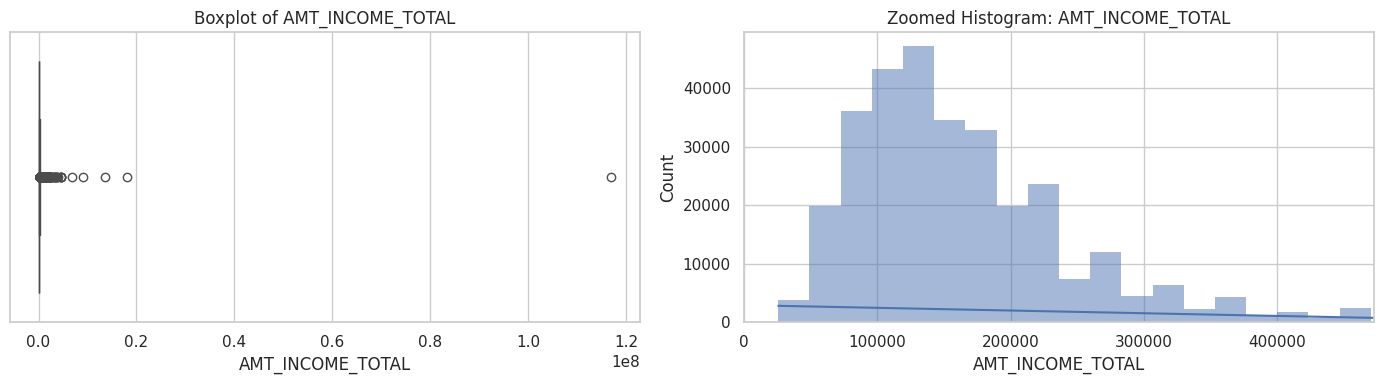


 Checking column: AMT_CREDIT:
count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64
Q1: 270000.0, Q3: 808650.0, IQR: 538650.0
Lower bound: -537975.0, Upper bound: 1616625.0
Number of values below lower bound: 0
Number of values above upper bound: 6562


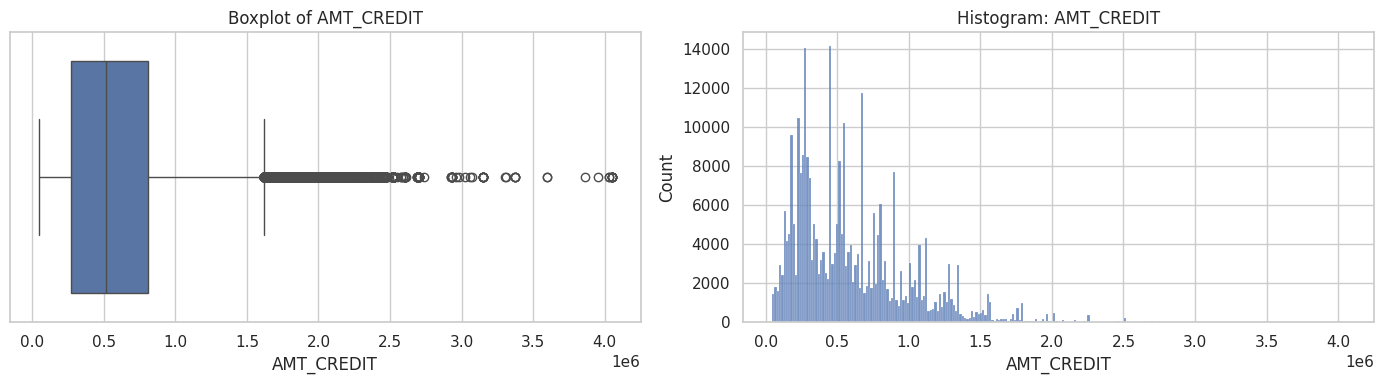


 Checking column: AMT_ANNUITY:
count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64
Q1: 16524.0, Q3: 34596.0, IQR: 18072.0
Lower bound: -10584.0, Upper bound: 61704.0
Number of values below lower bound: 0
Number of values above upper bound: 7504


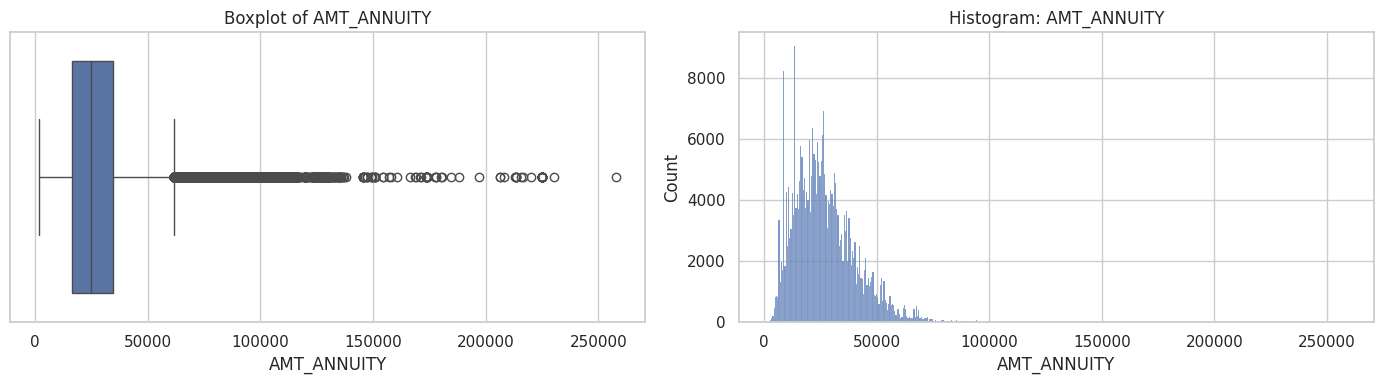


 Checking column: AMT_GOODS_PRICE:
count    3.075110e+05
mean     5.383163e+05
std      3.692890e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
Q1: 238500.0, Q3: 679500.0, IQR: 441000.0
Lower bound: -423000.0, Upper bound: 1341000.0
Number of values below lower bound: 0
Number of values above upper bound: 14728


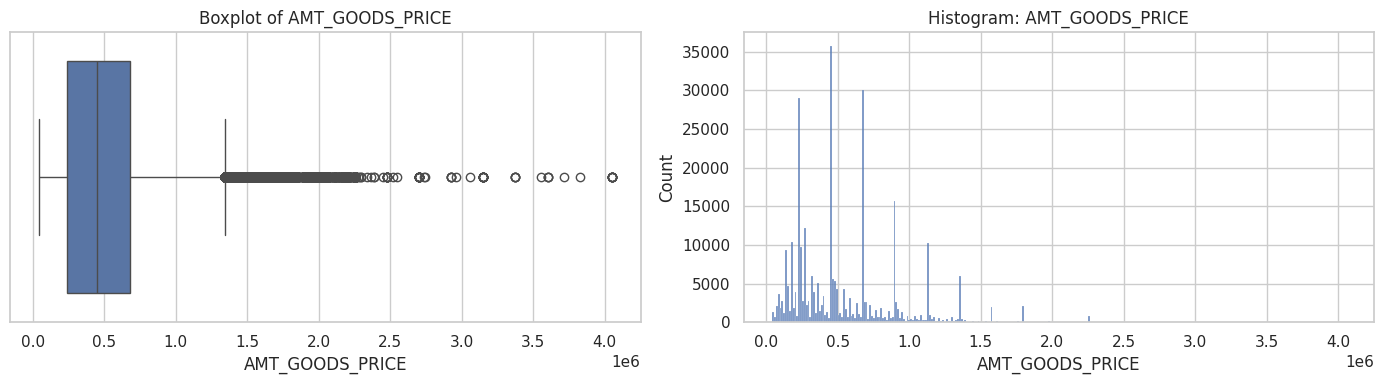


 Checking column: CNT_CHILDREN:
count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
Q1: 0.0, Q3: 1.0, IQR: 1.0
Lower bound: -1.5, Upper bound: 2.5
Number of values below lower bound: 0
Number of values above upper bound: 4272


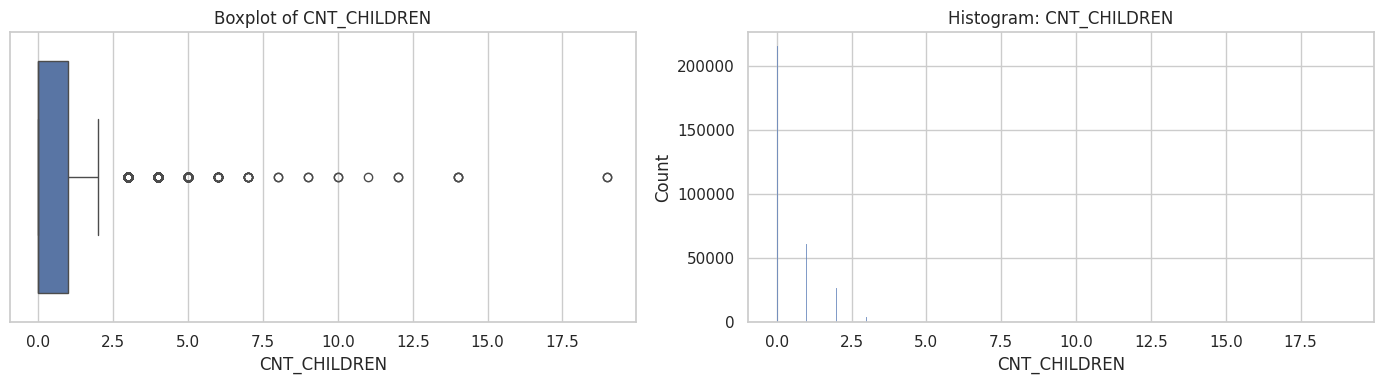


 Checking column: CNT_FAM_MEMBERS:
count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64
Q1: 2.0, Q3: 3.0, IQR: 1.0
Lower bound: 0.5, Upper bound: 4.5
Number of values below lower bound: 0
Number of values above upper bound: 4007


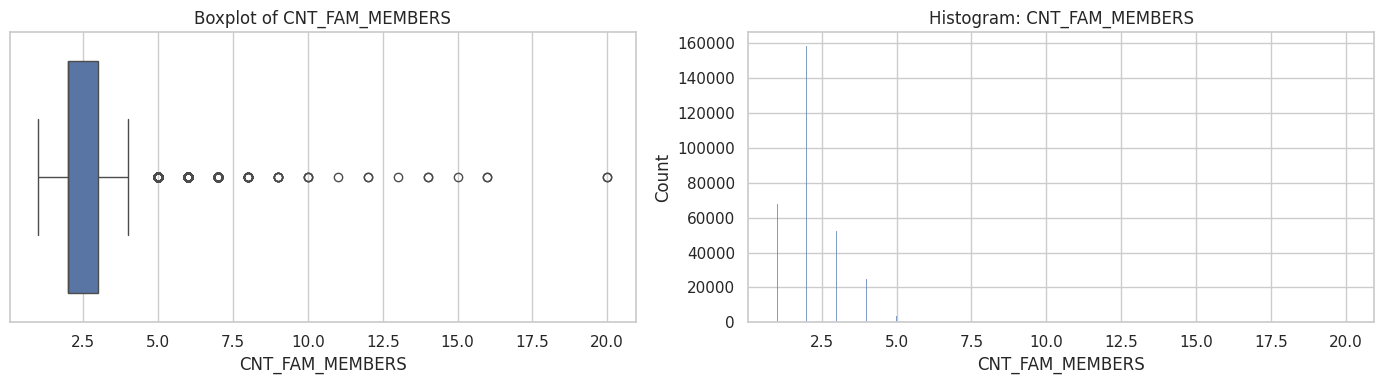


 Checking column: DAYS_BIRTH:
count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64
Q1: -19682.0, Q3: -12413.0, IQR: 7269.0
Lower bound: -30585.5, Upper bound: -1509.5
Number of values below lower bound: 0
Number of values above upper bound: 0


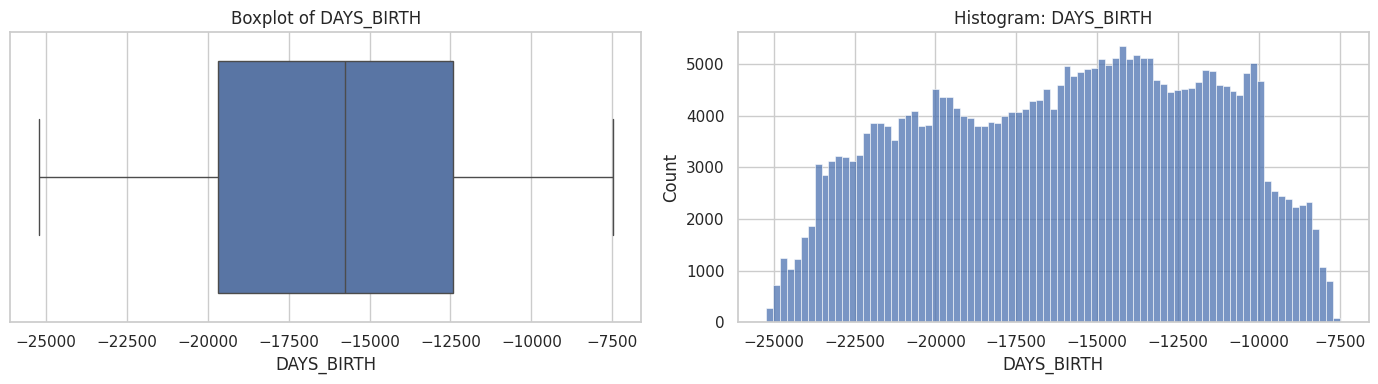


 Checking column: DAYS_EMPLOYED:
count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
Q1: -2760.0, Q3: -289.0, IQR: 2471.0
Lower bound: -6466.5, Upper bound: 3417.5
Number of values below lower bound: 16843
Number of values above upper bound: 55374


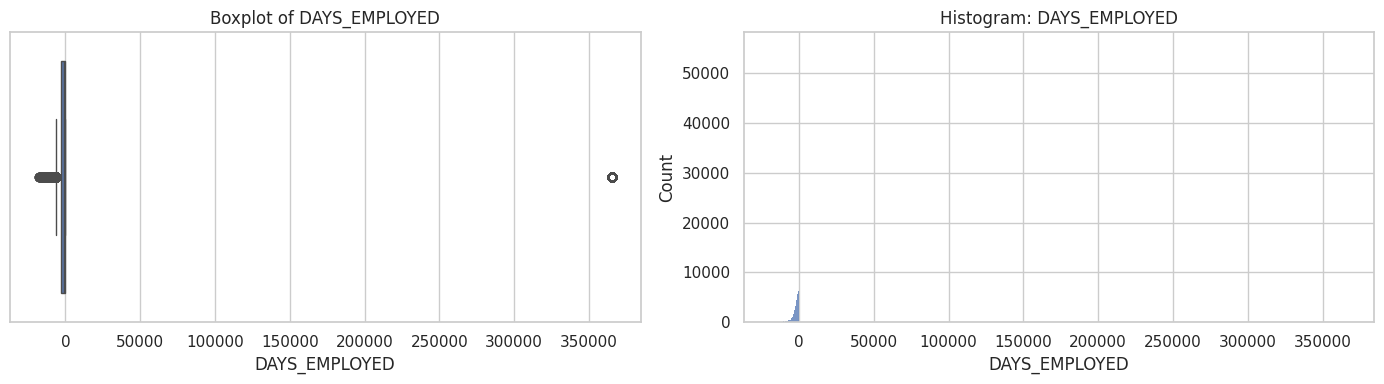


 Checking column: EXT_SOURCE_2:
count    3.075110e+05
mean     5.145034e-01
std      1.908699e-01
min      8.173617e-08
25%      3.929737e-01
50%      5.659614e-01
75%      6.634218e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64
Q1: 0.3929737210031833, Q3: 0.663421802279324, IQR: 0.27044808127614073
Lower bound: -0.012698400911027807, Upper bound: 1.069093924193535
Number of values below lower bound: 0
Number of values above upper bound: 0


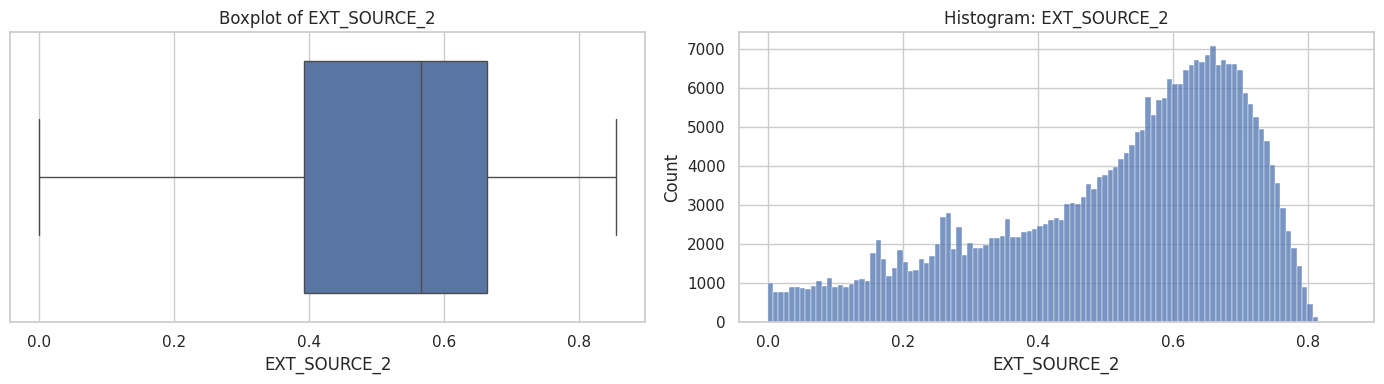


 Checking column: EXT_SOURCE_3:
count    307511.000000
mean          0.515695
std           0.174736
min           0.000527
25%           0.417100
50%           0.535276
75%           0.636376
max           0.896010
Name: EXT_SOURCE_3, dtype: float64
Q1: 0.4170996682522097, Q3: 0.6363761710860439, IQR: 0.21927650283383426
Lower bound: 0.08818491400145828, Upper bound: 0.9652909253367954
Number of values below lower bound: 4313
Number of values above upper bound: 0


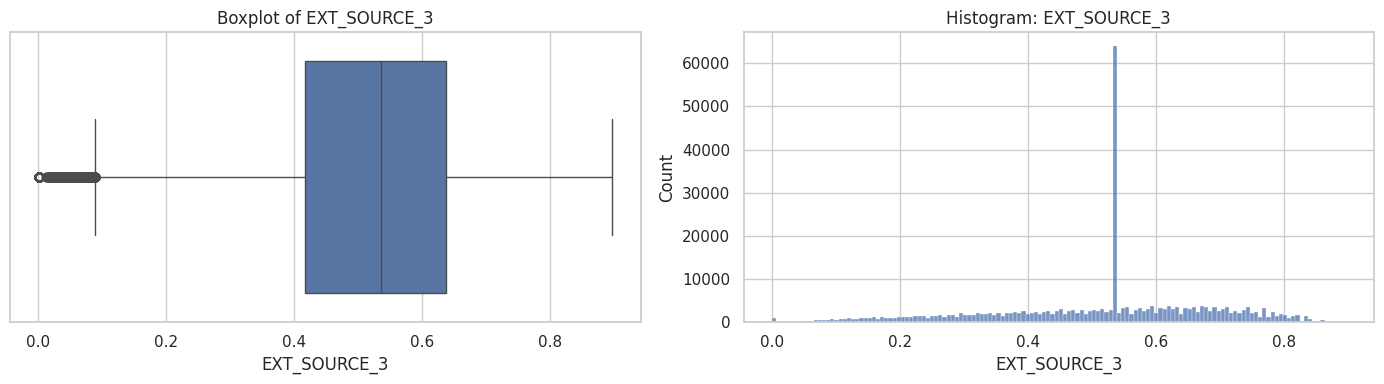

In [294]:
#Now, looping through each and plotting a boxplot and histogram for each
for col in outlier_cols:

  #Printing the stats for each column:
  print(f'\n Checking column: {col}:')
  print(application_df[col].describe())

  #Calculating the Interquartile Range (IQR) for each:
  Q1 = application_df[col].quantile(0.25)
  Q3 = application_df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  print(f'Q1: {Q1}, Q3: {Q3}, IQR: {IQR}')
  print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')

  #Calulating the number of values in the lower and upper bounds:
  below = (application_df[col] < lower_bound).sum()
  above = (application_df[col] > upper_bound).sum()

  print(f'Number of values below lower bound: {below}')
  print(f'Number of values above upper bound: {above}')

  #Plotting the boxplot and histograms for each

  fig, axes = plt.subplots(1,2, figsize=(14,4))

  sns.boxplot(x=application_df[col], ax=axes[0])
  axes[0].set_title(f'Boxplot of {col}')

  #Special zoom for AMT_INCOME_TOTAL:
  if col == 'AMT_INCOME_TOTAL':
            sns.histplot(application_df[col], bins=5000, kde=True, ax=axes[1])
            axes[1].set_xlim(0, 472500.0)  # Adjust zoom if needed
            axes[1].set_title(f"Zoomed Histogram: {col}")
  else:
            sns.histplot(application_df[col], ax=axes[1])
            axes[1].set_title(f"Histogram: {col}")

  plt.tight_layout()
  plt.show()

Outlier checks were performed for key numeric variables identified visually and by inspecting summary stats such as min, max, IQR. For this EDA, no records were removed but unusual values are noted for treatment in final deployment.

###OUTLIER ANALYSIS:

AMT_INCOME_TOTAL: This is right skewed and shows most income are between ₹112k and ₹202k. Using IQR, it can be seen that around 14000 records are flagged as outliers with above ₹337k income. High incomes may indicate low default risk and are therefore retained for analysis. However, ₹117 million is an extremely high amount for an annual income. This may be an error as it is unlikely and is flagged for the EDA.

AMT_CREDIT: For this, the IQR method identifies loans above ₹1.6 million as defaulters and found that there are 6562 such high-value loans. This may indicate high-risk loans and so these are retained for risk profiling.

AMT_ANNUITY: Most annuities seem to fall  between ₹16500 and ₹34500. Annuities above ₹61700 are flagged as outliers (7500 cases of such). High annuities mean larger repayment obligations for very high loans, and are retained to assess repayment stress.

AMT_GOODS_PRICE: Ranges between ₹238k and ₹680k. Goods priced above ₹1.34M are flagged as outliers with almost 14,700 cases. These represent large-value purchases like real estate or vehicles, which are kept to understand high-value loan segments.

CNT_CHILDREN: Most applicants seem to have 0-1 children, while some have more than 2.5(3) children (almost 4200 cases) which are flagged as outliers. However, it can be seen thagt some familikes have 19 children, which may be a very rare case or an error. So this is flagged for deeper understanding.

CNT_FAM_MEMBERS: Ranges between 2-3 members per household in the normal range. But those with more than 5 family members are flagged as outliers. There are atleast 4000 cases of these outliers which might mean joint family situations. It is worth noting that large families may imply higher exenses and therefore higher risk.

DAYS_BIRTH: This column indicates days of birth in negative days from today. The lower bound has 30585.5 days indicating an age of older than 83 years and the upper bound has 1509 days indicating an age of about 4 years which is not possible for loan. We can see both of the bounds have counts of 0 indicating no outliers. While the age range of loan applicants is 20-69 years which is realistic.

DAYS_EMPLOYED: this shows how long a citizen has been employed. The cluster of 365243 is a proxy for unemployed and is to be treated separately, not as outliers. Also, the negative tail of 6466 implies long tenures.

EXT_SOURCE_2: This is a normalized external risk score. All values lie within [0, 1]. No outliers detected using IQR, confirming stable external scoring.

EXT_SOURCE_3: This is another normalized risk score (0-1). Values below 0.088 are flagged as low-score outliers (almost 4,300 cases) but are retained as they signal higher credit risk.”

The columns DAYS_REGISTRATION and DAYS_ID_PUBLISH were reviewed separately. Their ranges (negative values indicating past registration or ID update) are plausible and show no obvious outliers. Therefore, no further outlier treatment was required for these variables.

In [295]:
print(application_df['DAYS_REGISTRATION'].describe())
print(application_df['DAYS_ID_PUBLISH'].describe())

count    307511.000000
mean      -4986.120328
std        3522.886321
min      -24672.000000
25%       -7479.500000
50%       -4504.000000
75%       -2010.000000
max           0.000000
Name: DAYS_REGISTRATION, dtype: float64
count    307511.000000
mean      -2994.202373
std        1509.450419
min       -7197.000000
25%       -4299.000000
50%       -3254.000000
75%       -1720.000000
max           0.000000
Name: DAYS_ID_PUBLISH, dtype: float64


##8) Univariate Analysis for Certain Categorical Variables:


VALUE COUNTS: NAME_EDUCATION_TYPE
NAME_EDUCATION_TYPE
Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: proportion, dtype: float64


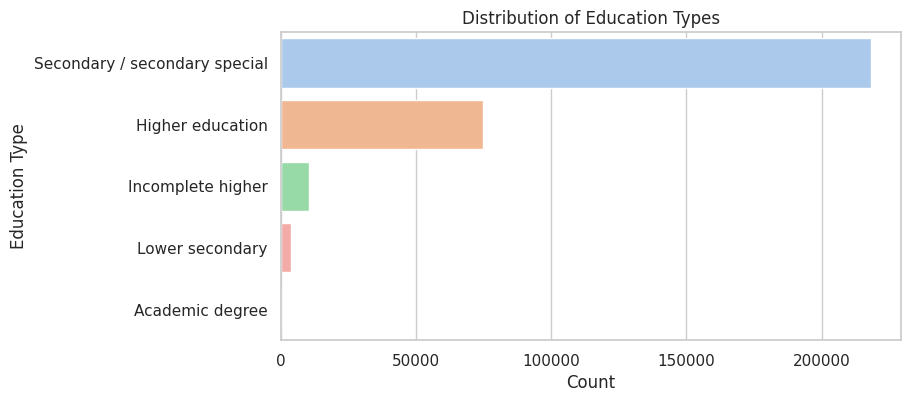


VALUE COUNTS: NAME_INCOME_TYPE
NAME_INCOME_TYPE
Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: proportion, dtype: float64


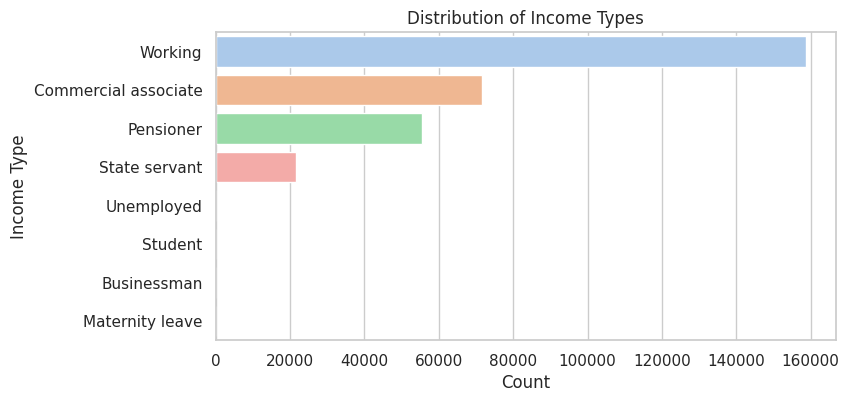


VALUE COUNTS: NAME_FAMILY_STATUS
NAME_FAMILY_STATUS
Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Unknown                  0.000650
Name: proportion, dtype: float64


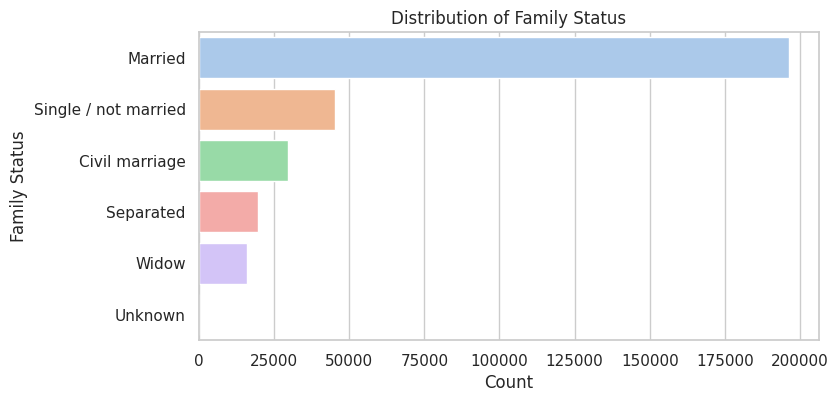


VALUE COUNTS: NAME_HOUSING_TYPE
NAME_HOUSING_TYPE
House / apartment      88.734387
With parents            4.825844
Municipal apartment     3.636618
Rented apartment        1.587260
Office apartment        0.851026
Co-op apartment         0.364865
Name: proportion, dtype: float64


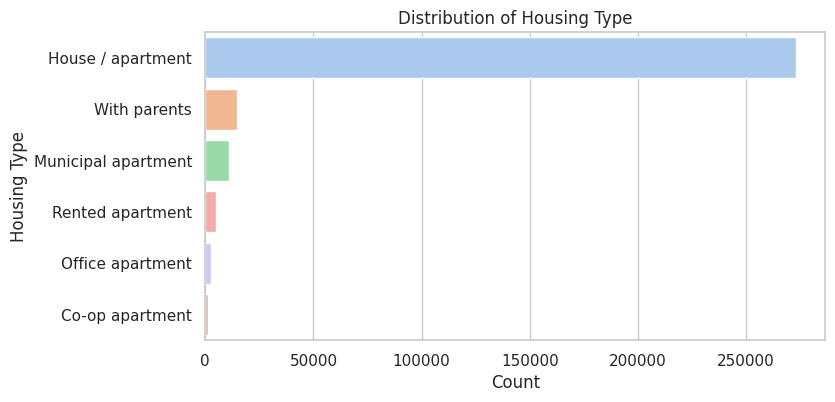


VALUE COUNTS: CODE_GENDER
CODE_GENDER
F    65.835249
M    34.164751
Name: proportion, dtype: float64


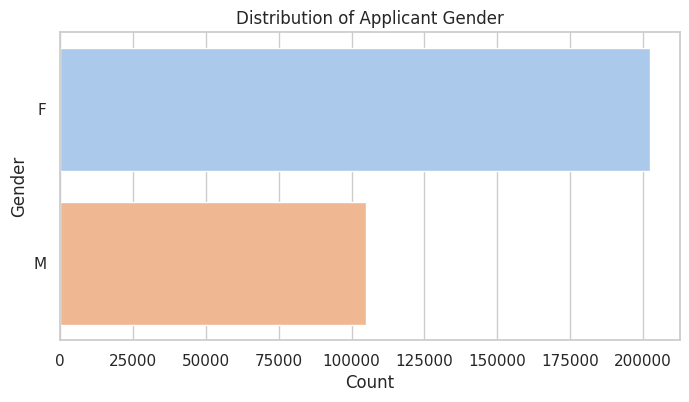

In [296]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up style
sns.set(style="whitegrid")

# 1) NAME_EDUCATION_TYPE
print("\nVALUE COUNTS: NAME_EDUCATION_TYPE")
print(application_df['NAME_EDUCATION_TYPE'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 4))
sns.countplot(y='NAME_EDUCATION_TYPE',
              data=application_df,
              order=application_df['NAME_EDUCATION_TYPE'].value_counts().index,
              palette='pastel')
plt.title('Distribution of Education Types')
plt.xlabel('Count')
plt.ylabel('Education Type')
plt.show()

# 2) NAME_INCOME_TYPE
print("\nVALUE COUNTS: NAME_INCOME_TYPE")
print(application_df['NAME_INCOME_TYPE'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 4))
sns.countplot(y='NAME_INCOME_TYPE',
              data=application_df,
              order=application_df['NAME_INCOME_TYPE'].value_counts().index,
              palette='pastel')
plt.title('Distribution of Income Types')
plt.xlabel('Count')
plt.ylabel('Income Type')
plt.show()

# 3) NAME_FAMILY_STATUS
print("\nVALUE COUNTS: NAME_FAMILY_STATUS")
print(application_df['NAME_FAMILY_STATUS'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 4))
sns.countplot(y='NAME_FAMILY_STATUS',
              data=application_df,
              order=application_df['NAME_FAMILY_STATUS'].value_counts().index,
              palette='pastel')
plt.title('Distribution of Family Status')
plt.xlabel('Count')
plt.ylabel('Family Status')
plt.show()

# 4) NAME_HOUSING_TYPE
print("\nVALUE COUNTS: NAME_HOUSING_TYPE")
print(application_df['NAME_HOUSING_TYPE'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 4))
sns.countplot(y='NAME_HOUSING_TYPE',
              data=application_df,
              order=application_df['NAME_HOUSING_TYPE'].value_counts().index,
              palette='pastel')
plt.title('Distribution of Housing Type')
plt.xlabel('Count')
plt.ylabel('Housing Type')
plt.show()

# 4) CODE_GENDER
application_df = application_df[application_df['CODE_GENDER'] != 'XNA']

print("\nVALUE COUNTS: CODE_GENDER")
print(application_df['CODE_GENDER'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 4))
sns.countplot(y='CODE_GENDER',
              data=application_df,
              order=application_df['CODE_GENDER'].value_counts().index,
              palette='pastel')
plt.title('Distribution of Applicant Gender')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

###Quick note on the above catergorical univariate analysis:
* Majority applicants have an education level of Secondary/Higher Education
* Majority applicants are working or have commercial income.
* Majority of the applicants are married.
* Majority of the applicants live in a house/apartment.
* Majority of applicants are female (65.835249%) as compared to male(34.164751%)





##9) Checking for Data imbalance in the Target column

In [297]:
#Counting target variables
target_counts = application_df['TARGET'].value_counts()
target_counts

TARGET
0    282682
1     24825
Name: count, dtype: int64

In [298]:
#Percentage
target_percentage = application_df['TARGET'].value_counts(normalize=True) * 100
target_percentage

TARGET
0    91.927013
1     8.072987
Name: proportion, dtype: float64

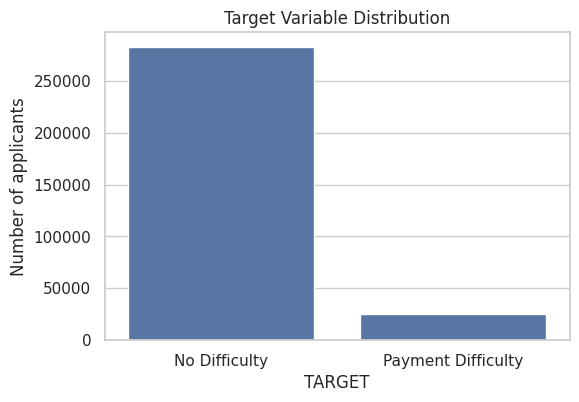

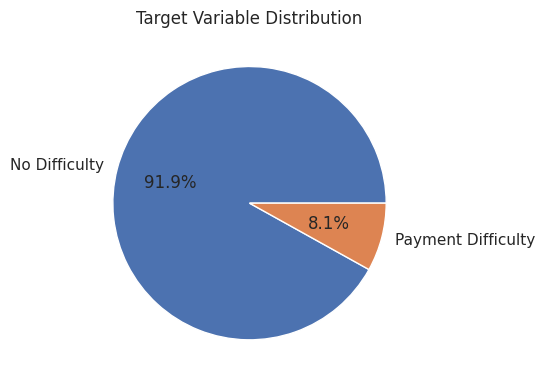

In [299]:
#Plotting bar plot and pie chart(for percentage):
plt.figure(figsize = (6,4))

sns.barplot(x = target_counts.index, y = target_counts.values)
plt.xticks([0,1], ['No Difficulty', 'Payment Difficulty'])
plt.title('Target Variable Distribution')
plt.ylabel('Number of applicants')

plt.figure(figsize=(6,4))

plt.pie(target_percentage, labels = ['No Difficulty', 'Payment Difficulty'], autopct = '%1.1f%%')
plt.title('Target Variable Distribution')

plt.tight_layout()
plt.show()

###Note on the Target Variable Imbalance:


The TARGET column gives information about whether the applicant had difficulty in repayment of the loan (1) or not (0).
The distribution shows that 92% of applicants had no payment difficulties and only 8% had payment difficulties.

What is its significance?

This big imbalance is important because it means most people in the dataset repay their loans properly. So, if we built a simple model, it could just predict everyone will repay and still look 92% accurate. But that wouldn not quite help the bank find risky customers.

Since defaulters are the small minority here, care should be taken about:


* Choosing the right metrics (like precision, recall, F1-score, or AUC) instead of just accuracy.
* Using resampling techniques like oversampling defaulters or undersampling non-defaulters.
* Making sure our features actually help us separate the risky customers from the safe ones.

In short, the imbalance shows us that the data needs to be handled carefully during modeling so that the bank can spot even this small percentage of risky cases correctly.


##10) Bivariate Analysis of Categorical vs TARGET variables

In this section, an analysis is conducted to show how different categorical variables (like Education Type, Income Type, etc.) are related to the target variable (TARGET). Technically, this is a bivariate analysis because each variable is compared with the target outcome (defaulter or non-defaulter). However, since only one independent variable is observed at a time and seeing how the TARGET splits its categories, this is also called segmented univariate analysis. In other words, each variable is being segmented by the TARGET to check if there are clear patterns that explain default risk. This helps the company know which customer groups may be riskier and why.

###10.1) NAME_EDUCATION_TYPE vs TARGET

Mean Target values by Education Type: NAME_EDUCATION_TYPE
Lower secondary                  0.109277
Secondary / secondary special    0.089400
Incomplete higher                0.084858
Higher education                 0.053552
Academic degree                  0.018293
Name: TARGET, dtype: float64


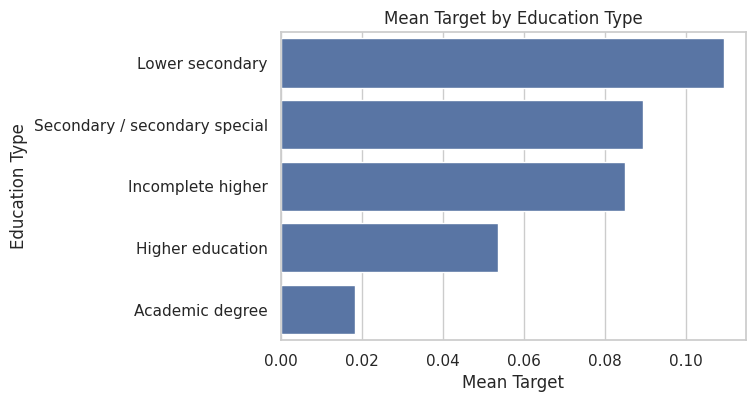

In [300]:
#Group by Education and checking mean TARGET
education_target = application_df.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending = False)
print('Mean Target values by Education Type:',education_target)

#Plotting the barplot:
plt.figure(figsize = (6,4))
sns.barplot(x = education_target.values,
            y = education_target.index)
plt.title('Mean Target by Education Type')
plt.xlabel('Mean Target')
plt.ylabel('Education Type')
plt.show()

The mean target value varies across different education types. A clear trend is noticed where applicants with lower levels of education have a higher chance of facing payment difficulties. For example, clients with only Lower secondary education have the highest mean target (around 10.9%), while those with an Academic degree have the lowest (around 1.8%). This suggests that higher education levels may be linked with better financial stability and lower risk of default. This insight could help the company consider education as one of the factors while assessing credit risk.

###10.2) NAME_INCOME_TYPE vs TARGET

Mean Target values by Income Type: NAME_INCOME_TYPE
Maternity leave         0.400000
Unemployed              0.363636
Working                 0.095887
Commercial associate    0.074844
State servant           0.057550
Pensioner               0.053864
Businessman             0.000000
Student                 0.000000
Name: TARGET, dtype: float64


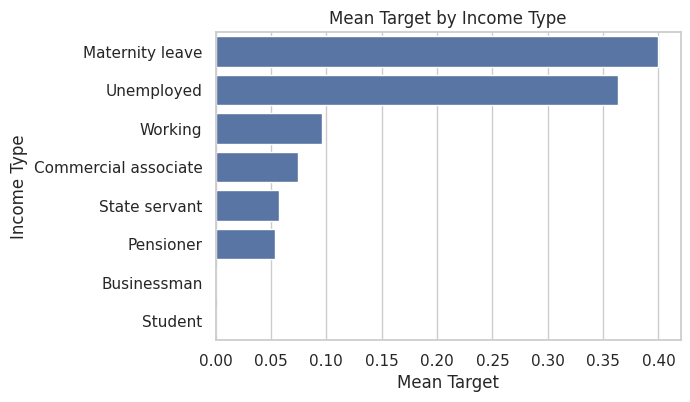

In [301]:
#Group by NAME_INCOME_TYPE and check Mean TARGET
income_target = application_df.groupby('NAME_INCOME_TYPE')['TARGET'].mean().sort_values(ascending = False)
print('Mean Target values by Income Type:',income_target)

#Plotting the barplot:
plt.figure(figsize = (6,4))
sns.barplot(x = income_target.values,
            y = income_target.index)
plt.title('Mean Target by Income Type')
plt.xlabel('Mean Target')
plt.ylabel('Income Type')
plt.show()

From the above analysis, it is clearly depicted that the likelihood of payment difficulties are mostly by applicants who are on Maternity Leave or are Unemployed with the highest mean target values of 40% and 37%, respectively. This makes sense because they may have unstable income and therefore face issues in loan repayment. In contrast, Commercial Associate, State Servant and Pensioner have the lowest mean target values, indicating lesser risk. Interestingly, Businessman and Student have no cases of default, which may be because of low sample size or other factors. This shows that income type may be a strong factor while assessing risk.

###10.3) NAME_FAMILY_STATUS vs TARGET

Mean Target values by Family Status: NAME_FAMILY_STATUS
Civil marriage          0.099449
Single / not married    0.098077
Separated               0.081942
Married                 0.075600
Widow                   0.058242
Unknown                 0.000000
Name: TARGET, dtype: float64


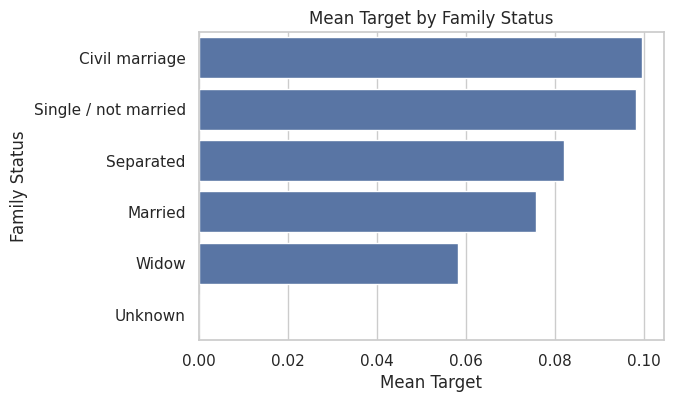

In [302]:
#Group by Family Status vs Mean Target
famstatus_target = application_df.groupby('NAME_FAMILY_STATUS')['TARGET'].mean().sort_values(ascending = False)
print('Mean Target values by Family Status:',famstatus_target)

#Plotting the barplot:
plt.figure(figsize = (6,4))
sns.barplot(x = famstatus_target.values,
            y = famstatus_target.index)
plt.title('Mean Target by Family Status')
plt.xlabel('Mean Target')
plt.ylabel('Family Status')
plt.show()

From the plot, it can be seen that applicants with Civil marriage and Single / not married status have a higher mean target value (around 9-10%), meaning they have a slightly higher chance of default compared to Married or Widow applicants (around 5-7%). This may be because applicants who are single or in a civil marriage have only one source of income which could make them slightly riskier for loan repayment if any financial issues. On the other hand, widows tend to be older and might receive pensions or have fewer large financial liabilities (like dependent children), which could reduce their risk The Unknown category has 0 because there may be too few or no valid cases.

###10.4) NAME_HOUSING_TYPE vs TARGET

Mean Target values by Housing Type: NAME_HOUSING_TYPE
Rented apartment       0.123131
With parents           0.116981
Municipal apartment    0.085405
Co-op apartment        0.079323
House / apartment      0.077958
Office apartment       0.065724
Name: TARGET, dtype: float64


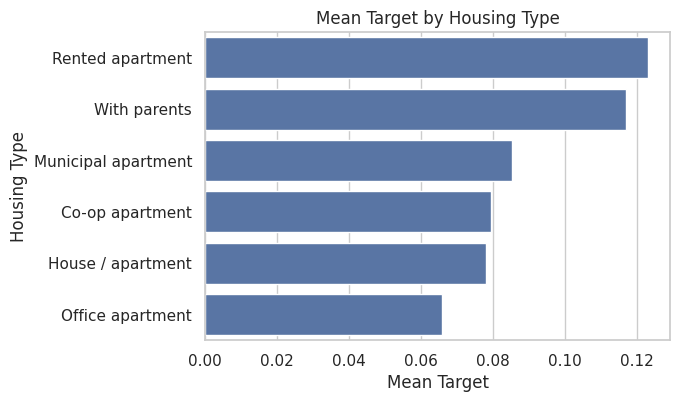

In [303]:
#Group b y housing type and mean TARGET
famhouse_target =application_df.groupby('NAME_HOUSING_TYPE')['TARGET'].mean().sort_values(ascending = False)
print('Mean Target values by Housing Type:',famhouse_target)

plt.figure(figsize=(6,4))
sns.barplot(x = famhouse_target.values,
            y = famhouse_target.index)
plt.title('Mean Target by Housing Type')
plt.xlabel('Mean Target')
plt.ylabel('Housing Type')
plt.show()

The plot shows that applicants living in Rented apartments and With parents have higher mean target values (around 11-12%) compared to those living in their own House/apartment or an Office apartment (around 6-8%). This may be because applicants who live in a rented house might have to pay monthly rent in addition to repaying a loan, which increases their fixed expenses and may make it harder to repay if their income changes. Applicants who live with their parents might be younger or in early career stages with less stable income, or income that is not very high. Although this can sometimes suggest fewer financial responsibilities, it can also cause lower financial independence. On the other hand, those living in Owned houses or Office apartments might have more stable living situations or higher income levels that help them manage repayments better.

###10.5) OCCUPATION_TYPE vs TARGET

Mean Target values by Occupation Type: OCCUPATION_TYPE
Low-skill Laborers       0.171606
Drivers                  0.113261
Waiters/barmen staff     0.112760
Security staff           0.107424
Laborers                 0.105788
Cooking staff            0.104440
Sales staff              0.096318
Cleaning staff           0.096067
Realty agents            0.078562
Secretaries              0.070498
Medicine staff           0.067002
Private service staff    0.065988
Unknown                  0.065132
IT staff                 0.064639
HR staff                 0.063943
Core staff               0.063042
Managers                 0.062140
High skill tech staff    0.061599
Accountants              0.048303
Name: TARGET, dtype: float64


Text(0, 0.5, 'Occupation Type')

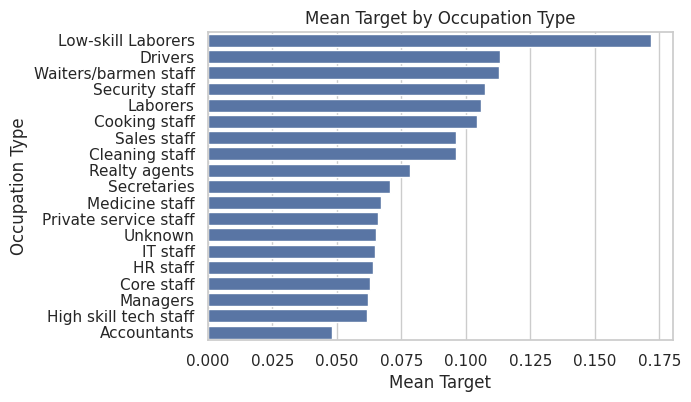

In [304]:
#Group by OCCUPATION_TYPE and mean TARGET
occupation_target = application_df.groupby('OCCUPATION_TYPE')['TARGET'].mean().sort_values(ascending = False)
print('Mean Target values by Occupation Type:',occupation_target)

plt.figure(figsize=(6,4))
sns.barplot(x = occupation_target.values,
            y = occupation_target.index)
plt.title('Mean Target by Occupation Type')
plt.xlabel('Mean Target')
plt.ylabel('Occupation Type')

The occupation type of an applicant can strongly influence their likelihood of defaulting on a loan. We see that people working as low-skill laborers, drivers, waiters, and security staff have higher mean default rates, which may be because these jobs usually offer lower or irregular incomes and less job security, making it harder to repay consistently. Also, occupations like waiters, drivers, and laborers are also more affected by changes in the economy. For example, a bad economy or lockdowns can mean they earn less or nothing. On the other hand, occupations like accountants, managers, and high-skill tech staff show much lower default rates, likely because these jobs come with better pay, more stability, and higher financial awareness. This suggests that occupation type is an important feature for understanding repayment risk, as it reflects earning potential and financial resilience, but it should ideally be used along with other factors for a more accurate credit assessment.

###10.6) CODE_GENDER vs TARGET

Mean Target values by Gender: CODE_GENDER
M    0.101419
F    0.069993
Name: TARGET, dtype: float64


Text(0, 0.5, 'Gender')

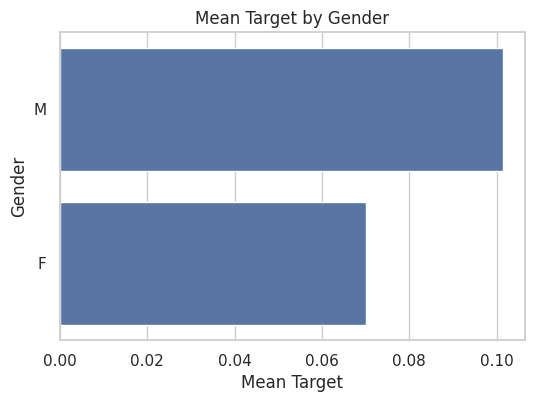

In [305]:
#Group by CODE_GENDER and mean TARGET
gender_target = application_df.groupby('CODE_GENDER')['TARGET'].mean().sort_values(ascending = False)
print('Mean Target values by Gender:',gender_target)

plt.figure(figsize=(6,4))
sns.barplot(x = gender_target.values,
            y = gender_target.index)
plt.title('Mean Target by Gender')
plt.xlabel('Mean Target')
plt.ylabel('Gender')

Females (F) have a much larger default rate than males (M). This could imply that women may be more likely to default due to socio-economic or contextual factors.

##11) Bivariate Analysis of Numerical vs TARGET columns:

In [306]:
#Converting DAYS_BIRTH to AGE
application_df['AGE'] = -application_df['DAYS_BIRTH'] / 365

In [307]:
#Taking the same numerical columns as we have done for Univariate / Outliers analysis to segment with TARGET
num_cols = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'CNT_CHILDREN',
    'CNT_FAM_MEMBERS',
    'AGE',
    'DAYS_EMPLOYED',
    'EXT_SOURCE_2',
    'EXT_SOURCE_3'
]

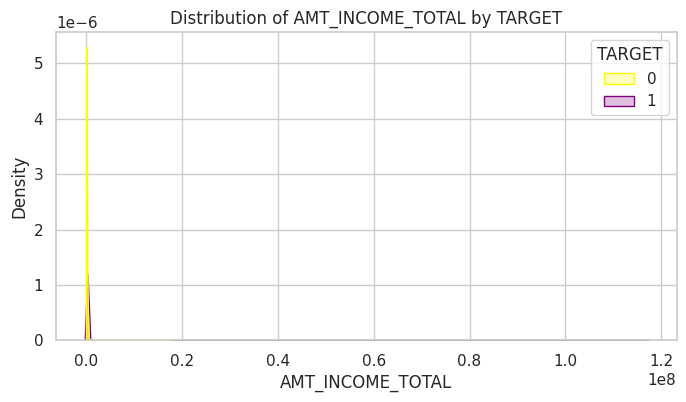

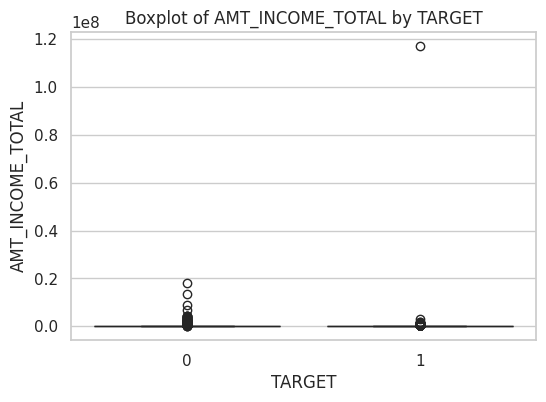

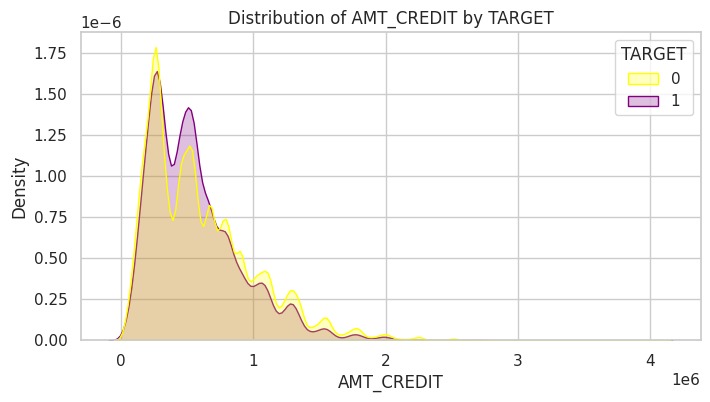

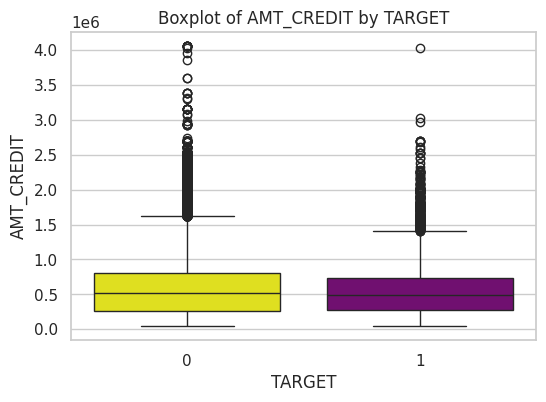

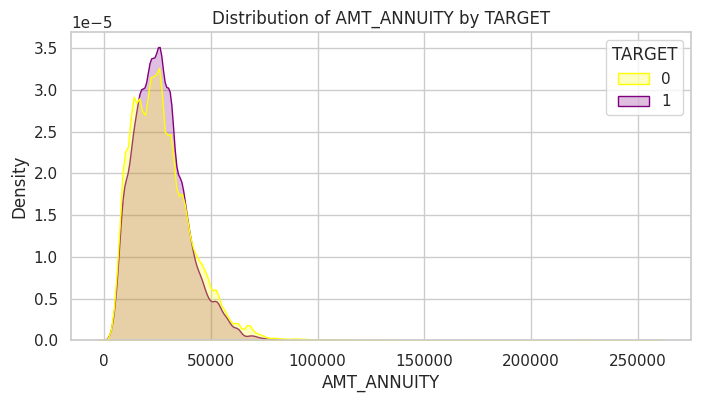

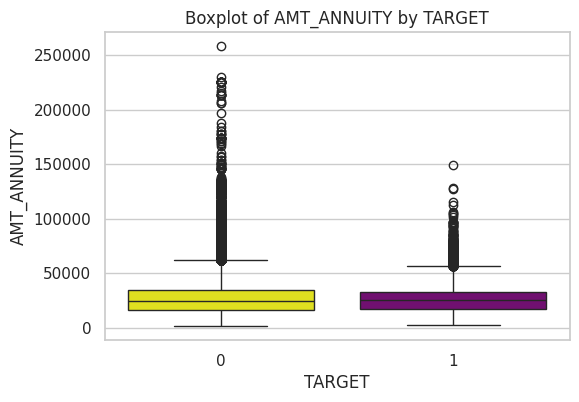

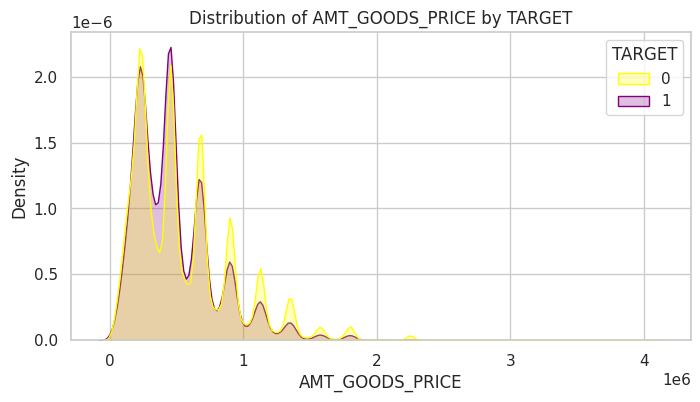

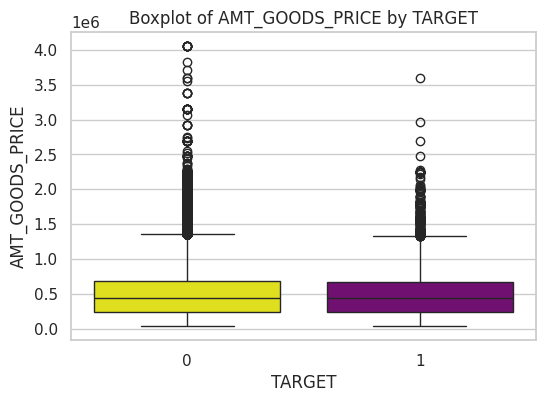

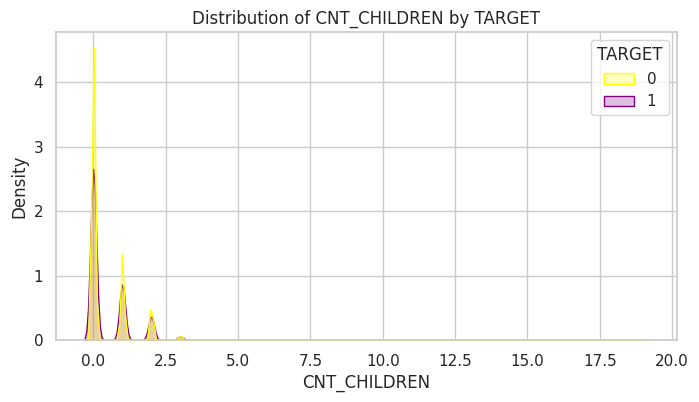

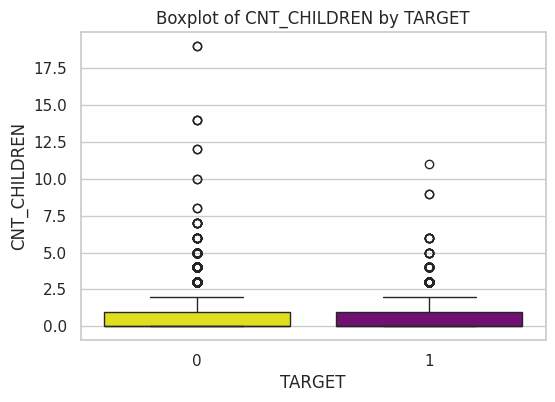

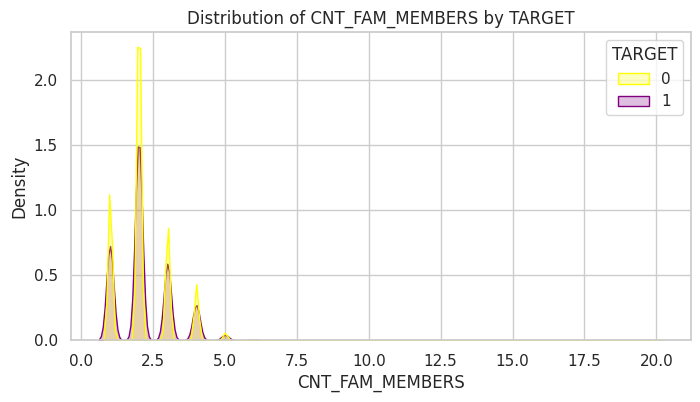

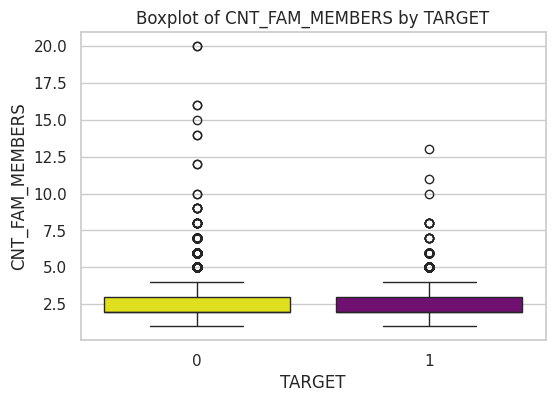

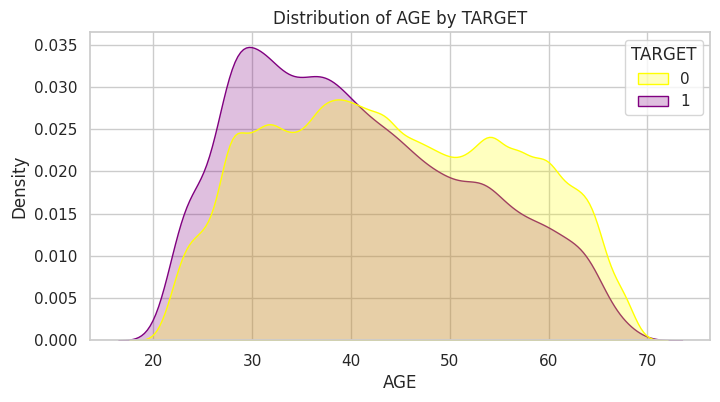

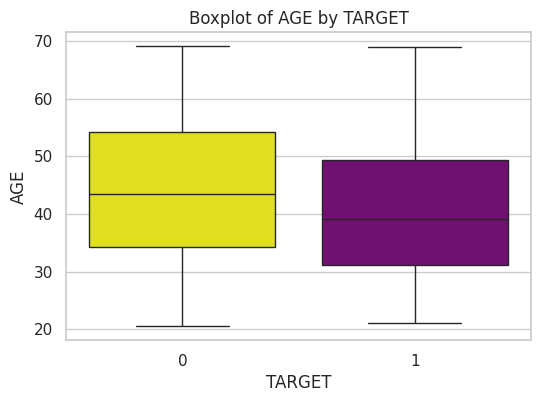

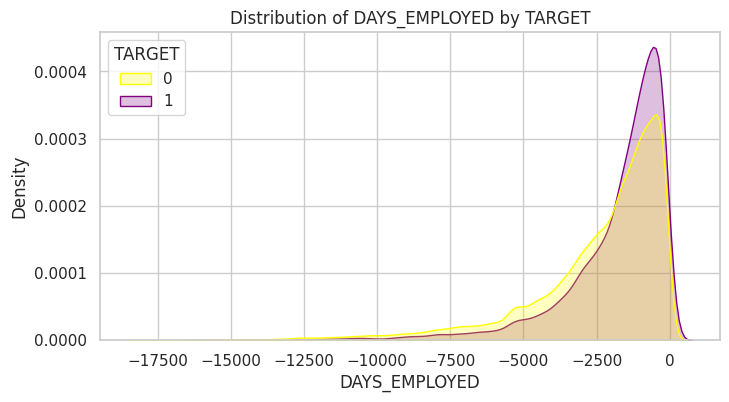

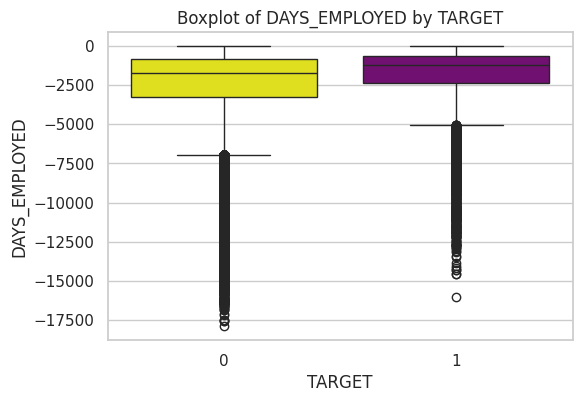

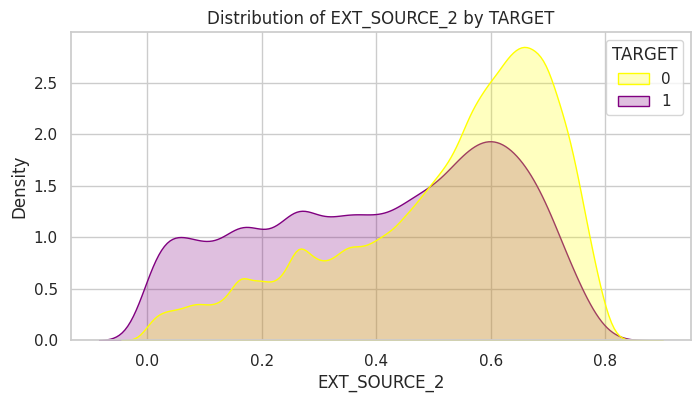

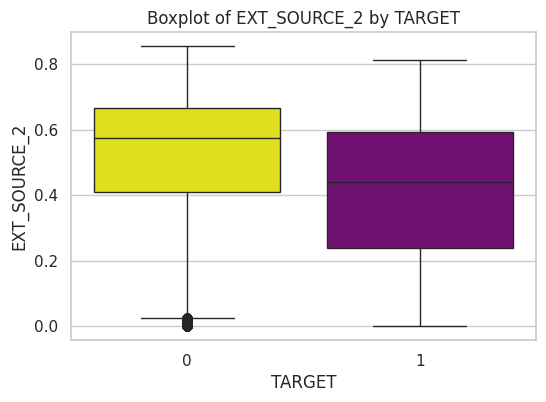

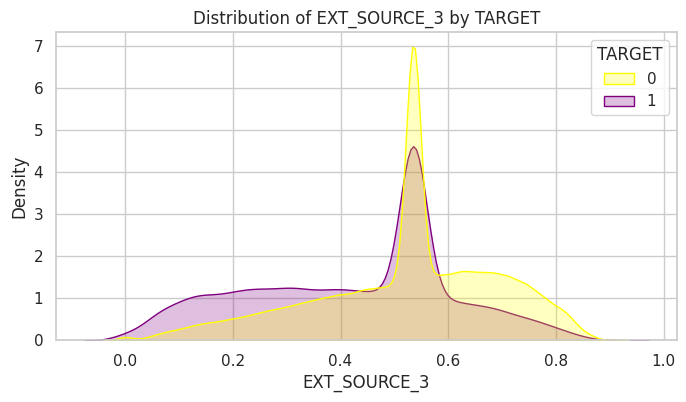

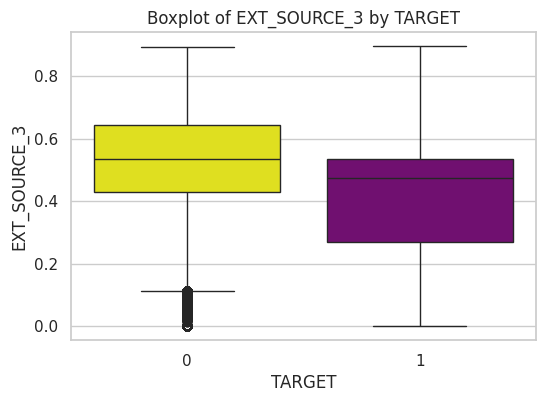

In [308]:
for col in num_cols:
    plt.figure(figsize=(8,4))
    if col == 'DAYS_EMPLOYED':
      df_filtered = application_df[application_df['DAYS_EMPLOYED'] < 365243]
      sns.kdeplot(
          data=df_filtered,
          x=col,
          hue='TARGET',
          fill=True,
          common_norm=False,
          palette=['yellow', 'purple']
      )
      plt.title(f'Distribution of {col} by TARGET')
      plt.show()
      plt.figure(figsize=(6,4))
      sns.boxplot(
          data=df_filtered,
          x='TARGET',
          y=col,
          palette=['yellow', 'purple']
      )
      plt.title(f'Boxplot of {col} by TARGET')
      plt.show()
    else:

    # KDE plot
      sns.kdeplot(
          data=application_df,
         x=col,
          hue='TARGET',
          fill=True,
          common_norm=False,
         palette=['yellow', 'purple']
        )
      plt.title(f'Distribution of {col} by TARGET')
      plt.show()

      # Boxplot
      plt.figure(figsize=(6, 4))
      sns.boxplot(
          data=application_df,
          x='TARGET',
          y=col,
          palette=['yellow', 'purple']
        )
      plt.title(f'Boxplot of {col} by TARGET')
      plt.show()

###Analysis Insights:

AMT_INCOME_TOTAL

The KDE plot shows that both defaulters and non-defaulters are heavily concentrated in the lower income ranges, with the defaulters slightly skewed toward the lower end. The boxplot indicates a large number of outliers in the non-defaulter group, with defaulters mostly concentrated below the median. This suggests that higher income may be associated with a lower risk of default, but income alone may not be a strong discriminator due to overlap.

AMT_CREDIT

Non-defaulters tend to have slightly higher credit amounts and more extreme upper outliers. Both groups have similar medians and distributions overall, but non-defaulters (TARGET = 0) are more frequently represented in higher credit ranges, indicating a slight association between larger credit and lower default risk. However, the overlap suggests AMT_CREDIT may not be a strong predictor in itself.

AMT_ANNUITY

Both KDE and boxplots show that defaulters generally have slightly higher annuity amounts, though the difference is modest. The outlier range is higher for non-defaulters, possibly due to some high-income individuals with large annuities but lower risk. Slight tendency toward risk may exist at mid-to-high annuity bands.

AMT_GOODS_PRICE

Applicants purchasing lower-priced goods are slightly more likely to default. There is a subtle shift indicating defaulters tend to take credit for lower-value goods compared to non-defaulters. However, the overall spread and overlap between the two classes suggest this feature should be used in combination with others like AMT_CREDIT or INCOME_TOTAL.

CNT_CHILDREN

The KDE and boxplot clearly show that defaulters are more likely to have more children. The boxplot shows defaulters have slightly more outliers at 3 to 5 children. This suggests that larger dependent family size may contribute to financial strain and repayment difficulties. Outliers with large numbers of children are rare and could be data errors or special cases.

CNT_FAM_MEMBERS

Similar to CNT_CHILDREN, the distribution is skewed slightly toward larger family sizes for defaulters. While most people have 2 to 4 family members, larger families tend to show more defaults. The outlier range suggests that unusually large families (e.g., more than 10 members) may pose significant risk.


AGE(Modified DAYS_BIRTH)

Defaulters peak around age 30, while non-defaulters are more spread across 40 to 60 years. This suggests that older applicants are generally more financially stable and that AGE appears to be a strong indicator of default risk.

DAYS_EMPLOYED

This variable is tricky because it contains some anomalous values (like 365243 indicating “never worked”). Filter out those values, the KDE plot now shows that defaulters (TARGET = 1) peak slightly closer to zero (i.e., fewer days employed), whereas non-defaulters (TARGET = 0) have a broader distribution, indicating longer employment histories. Both the plots reveal that defaulters tend to have shorter employment durations. This suggests job stability is a meaningful indicator of creditworthiness and should be preserved as a valuable feature.

EXT_SOURCE_2
The KDE plot curve peaks at around 0.6 to 0.7 for non-defaulters (TARGET = 0), while skewed left toward 0.1 to 0.4 for defaulters (TARGET = 1).The box plot shows non-defaulters have higher median and IQR and defaulters are heavily concentrated in the lower range. The External Source scores are one of the strongest predictors of risk. It clearly shows here that defaulters consistently have lower scores, while non-defaulters peak around higher values (around 0.6) making it a valuable feature for modeling


EXT_SOURCE_3

The KDE plot here has a slightly more overlap than EXT_SOURCE_2, but the curve for non-defaulters show a sharp peak near 0.55 and 0.6 whereas for defaulters, the curve has a flatter spread, more represented in 0.2 to 0.4. EXT_SOURCE_3 is also a strong predictor of default, though slightly weaker than EXT_SOURCE_2. Defaulters have lower scores, while non-defaulters tend to cluster in the upper half of the distribution. It complements EXT_SOURCE_2 effectively in predictive modeling.



##12) Correlation Analysis with TARGET

The TARGET variable indicates whether an applicant is likely to default (TARGET=1) or not (TARGET=0). By analyzing the correlation of each numerical varaible column with the TARGET variable, it can be identified which variables are predictive in the risk of default.


Top correlations with TARGET:
 TARGET                         1.000000
DAYS_BIRTH                     0.078242
REGION_RATING_CLIENT_W_CITY    0.060895
REGION_RATING_CLIENT           0.058901
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050992
FLAG_EMP_PHONE                 0.045984
REG_CITY_NOT_LIVE_CITY         0.044394
FLAG_DOCUMENT_3                0.044341
Name: TARGET, dtype: float64

Lowest correlations with TARGET:
 FLAG_PHONE                   -0.023801
HOUR_APPR_PROCESS_START      -0.024164
FLAG_DOCUMENT_6              -0.028603
AMT_CREDIT                   -0.030371
REGION_POPULATION_RELATIVE   -0.037225
AMT_GOODS_PRICE              -0.039625
DAYS_EMPLOYED                -0.044934
AGE                          -0.078242
EXT_SOURCE_3                 -0.155899
EXT_SOURCE_2                 -0.160294
Name: TARGET, dtype: float64


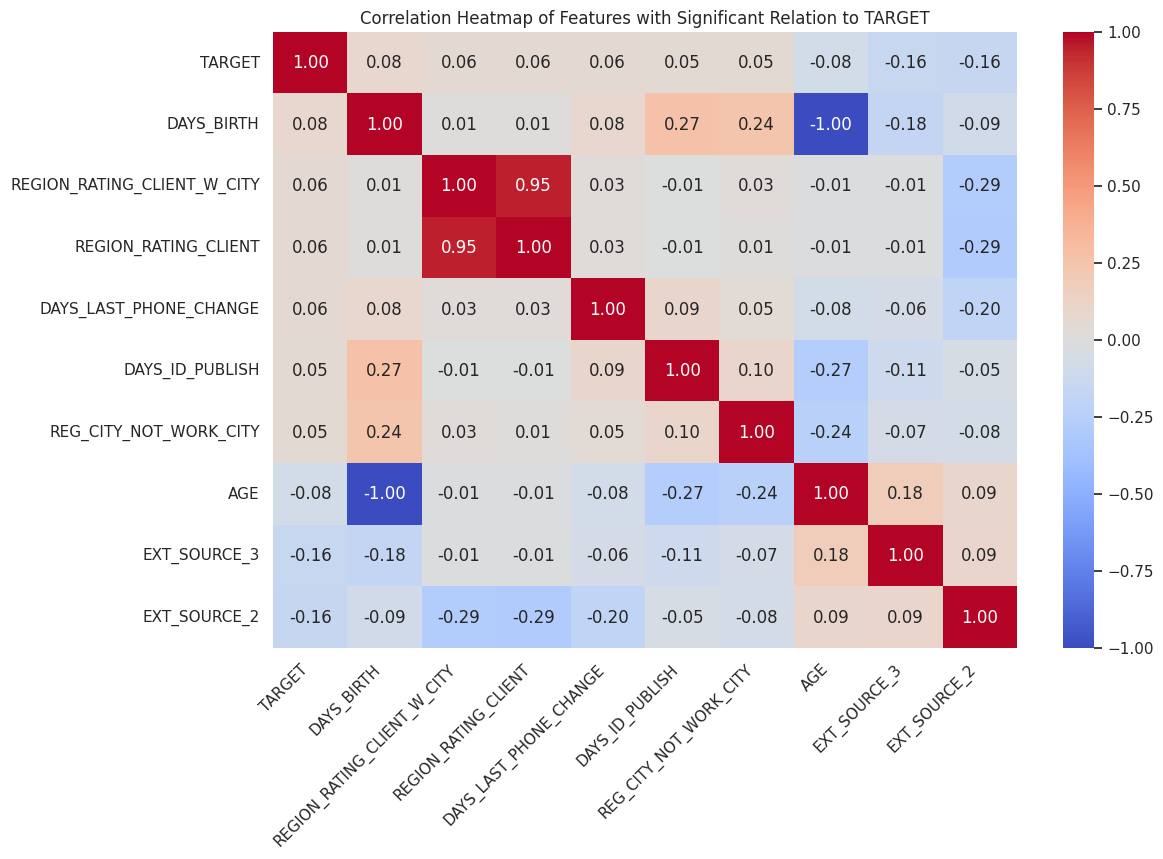

In [309]:
# Selecting only numerical columns
numerical_df = application_df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numerical_df.corr()

# Sort correlations with TARGET
target_corr = correlation_matrix['TARGET'].sort_values(ascending=False)

# Print top 10 positively and negatively correlated features
print("Top correlations with TARGET:\n", target_corr.head(10))
print("\nLowest correlations with TARGET:\n", target_corr.tail(10))

# Heatmap of correlations (optional: subset for top 15 features)
top_corr_features = target_corr[abs(target_corr) > 0.05].index

plt.figure(figsize=(12, 8))
sns.heatmap(application_df[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap of Features with Significant Relation to TARGET")
plt.show()

### Features positively correlated with TARGET=1

These features have a positive correlation with TARGET which means that as their values increase, the chances of default also tends to increase (though not always very strongly):
1.   DAYS_BIRTH (corr = 0.078): This is actually reverse-coded AGE (negative values). A positive correlation here means that younger applicants are more likely to default.

2.   REGION_RATING_CLIENT_W_CITY (0.061) and REGION_RATING_CLIENT (0.059): Applicants from lower-rated regions show a slightly higher risk.
1.   DAYS_LAST_PHONE_CHANGE (0.055): Those who recently changed their phone might show a bit more instability.
2.   DAYS_ID_PUBLISH (0.051): More recent ID updates are mildly linked to higher default chances.
5. REG_CITY_NOT_WORK_CITY (0.051): Applicants living in one city and working in another could be facing instability or commuting stress.

Although these are all low correlations, they might still carry some information when used along with other features.

### Features negatively correlated with TARGET

These features have a negative correlation with TARGET indicating that higher the values of these features, lower the chances of risk default.

1.   EXT_SOURCE_2 (-0.160): Strongest negative correlation. This is an external credit score, and higher values clearly indicate lower default risk.
2.   EXT_SOURCE_3 (-0.156): Similar to EXT_SOURCE_2, this is also a strong predictor. Non-defaulters score higher.
3. AGE (from DAYS_BIRTH) (-0.078): Older applicants are more financially stable and less likely to default.
4. DAYS_EMPLOYED (-0.045): People with longer employment durations show slightly lower risk.
5. AMT_GOODS_PRICE (-0.040): Higher-priced goods might be associated with more financially stable individuals.
6. AMT_CREDIT (-0.030): Weak negative relation, slightly indicating that higher credit amounts are not strongly linked to higher default.
7. REGION_POPULATION_RELATIVE (-0.037): Applicants from less populated areas may have slightly lower default rates.















### Summary on Correlation Matrix Analysis:
*   The external credit scores (EXT_SOURCE_2 & 3) are the most predictive of default risk.
*   Older age and longer employment are associated with lower risk.
*   Some region and behavioral features show slight correlation, but individually they aren not very strong.
*  Correlation values are not very high overall. This can be from real-world data, however, they give us useful insights for feature selection in future modeling.





##13) MERGE Previous Application Dataset to gather Insights from past applications.

In [310]:
# Create a working copy of previous application data
prev_df = previous_df.copy()

# Checking for nulls, duplicates, and shape
print("Previous Application Data Shape:", prev_df.shape)
print("Missing values in previous_df:\n", prev_df.isnull().sum().sort_values(ascending=False).head(10))


Previous Application Data Shape: (1670214, 37)
Missing values in previous_df:
 RATE_INTEREST_PRIVILEGED     1664263
RATE_INTEREST_PRIMARY        1664263
AMT_DOWN_PAYMENT              895844
RATE_DOWN_PAYMENT             895844
NAME_TYPE_SUITE               820405
DAYS_TERMINATION              673065
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
dtype: int64


In [311]:
# To summarize the past behaviour of each applicant using groupby and merge it with the main data
# Grouping by SK_ID_CURR and aggregating key insights from previous applications
prev_agg = prev_df.groupby('SK_ID_CURR').agg(
    num_prev_applications = ('SK_ID_PREV', 'count'),
    num_approved = ('NAME_CONTRACT_STATUS', lambda x: (x == 'Approved').sum()),
    num_refused = ('NAME_CONTRACT_STATUS', lambda x: (x == 'Refused').sum()),
    avg_prev_credit = ('AMT_CREDIT', 'mean'),
    max_prev_credit = ('AMT_CREDIT', 'max'),
    min_prev_credit = ('AMT_CREDIT', 'min')
).reset_index()


In [312]:
# Merge with the main data here
# Merge with application_df using SK_ID_CURR
application_df = pd.merge(application_df, prev_agg, on='SK_ID_CURR', how='left')

# Fill any NaNs that result from applicants with no previous records
application_df[['num_prev_applications', 'num_approved', 'num_refused']] = application_df[[
    'num_prev_applications', 'num_approved', 'num_refused']].fillna(0)

# Display new shape and sample
print("New application_df shape:", application_df.shape)
application_df[['num_prev_applications', 'num_approved', 'num_refused']].head()


New application_df shape: (307507, 80)


num_prev_applications  num_approved  num_refused
0                    1.0           1.0          0.0
1                    3.0           3.0          0.0
2                    1.0           1.0          0.0
3                    9.0           5.0          1.0
4                    6.0           6.0          0.0

In [313]:
# Summary statistics
print(application_df[['num_prev_applications', 'num_approved', 'num_refused']].describe())

# Compare defaults across previous application counts
application_df.groupby('num_prev_applications')['TARGET'].mean().sort_values(ascending=False).head(10)


       num_prev_applications   num_approved    num_refused
count          307507.000000  307507.000000  307507.000000
mean                4.597118       2.881482       0.797917
std                 4.179824       2.177519       1.774689
min                 0.000000       0.000000       0.000000
25%                 2.000000       1.000000       0.000000
50%                 3.000000       2.000000       0.000000
75%                 6.000000       4.000000       1.000000
max                73.000000      27.000000      68.000000


num_prev_applications
58.0    1.000000
46.0    0.666667
60.0    0.500000
38.0    0.416667
50.0    0.400000
40.0    0.333333
41.0    0.266667
32.0    0.259259
44.0    0.250000
54.0    0.250000
Name: TARGET, dtype: float64

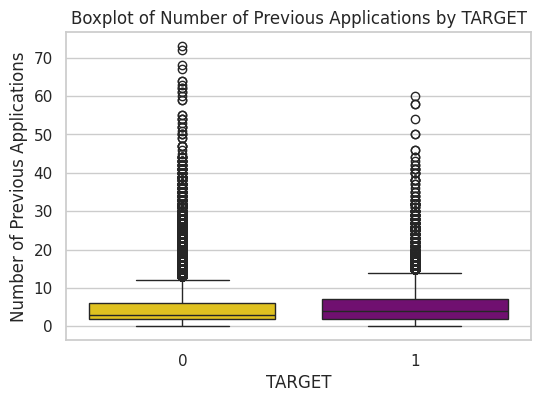

In [314]:
#plotting num_prev_applications against target to visualise the above analysis:
plt.figure(figsize=(6,4))
sns.boxplot(data=application_df, x='TARGET', y='num_prev_applications', palette=['gold', 'purple'])
plt.title("Boxplot of Number of Previous Applications by TARGET")
plt.xlabel("TARGET")
plt.ylabel("Number of Previous Applications")
plt.show()


Creating a barplot to understand if people who defaulted (TARGET = 1) had fewer approved loan application, or, is past loan approval ratio an indicator or predictive of default risk in the current loan.

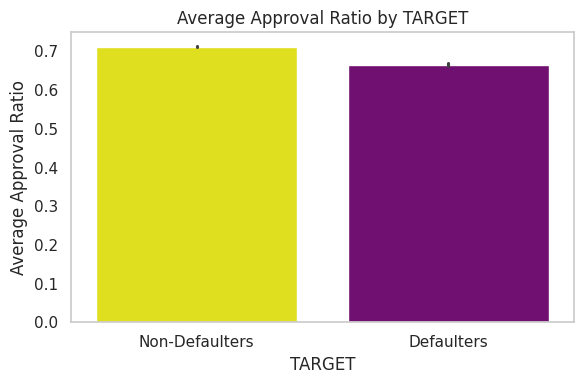

In [315]:
# Create approval ratio column
application_df['approval_ratio'] = application_df['num_approved'] / application_df['num_prev_applications']

#To prevent issues where division by 0 may occur and replace infinite values with 0:
application_df['approval_ratio'] = application_df['approval_ratio'].replace([float('inf'), -float('inf')], 0)

#To fill any missing values in the approval ratio with 0:
application_df['approval_ratio'] = application_df['approval_ratio'].fillna(0)

#plotting the bar plot against target
#Here, target=0, non-defaulters are yellow
#And target=1 , defaulters are purple
plt.figure(figsize = (6,4))
sns.barplot(data = application_df, x = 'TARGET', y = 'approval_ratio', palette = ['yellow', 'purple'])
plt.title('Average Approval Ratio by TARGET')
plt.ylabel('Average Approval Ratio')
plt.xlabel('TARGET')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()


###Average Approval Ratio vs TARGET Interpretation:

*   Although a small difference, however, non-defaulters have a higher average approval ratio ( at around 71%) for previous applications compared to defaulters (around 67%).

*   This suggests that applicants with a stronger past approval record are less likely to default.
*   Although the difference is not very large, it is meaningful and supports the inclusion of approval ratio as a predictive feature.

Insight:

Applicants who had a higher proportion of approved previous applications are less likely to default.







Creating a barplot with refusal ratio as a means to understand how often a customer was rejected in the past as an indicator of risk.

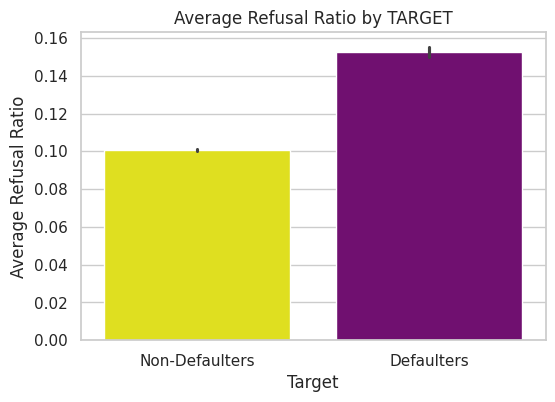

In [316]:
# Calculate refusal ratio by safely avoiding division by zero:
application_df['refusal_ratio'] = application_df.apply(
    lambda x: x['num_refused'] / x['num_prev_applications'] if x['num_prev_applications'] > 0 else 0,
    axis=1
)

# Plotting average refusal ratio grouped by TARGET
plt.figure(figsize=(6, 4))
sns.barplot(
    data=application_df,
    x='TARGET',
    y='refusal_ratio',
    palette=['yellow', 'purple']
)
plt.title('Average Refusal Ratio by TARGET')
plt.ylabel('Average Refusal Ratio')
plt.xlabel('Target')
plt.xticks([0, 1], ['Non-Defaulters', 'Defaulters'])
plt.show()


###Average Refusal Ratio vs TARGET Interpretation:

*  Defaulters have a significantly higher average refusal ratio (around 15%) than non-defaulters (around 10%).

*  This suggests that applicants who were frequently denied credit in the past are more likely to default.

*  The refusal ratio is a strong behavioral feature and complements the approval ratio in assessing credit risk.


Insight:

Applicants who had more past refusals may exhibit credit unworthiness. This is an inversely correlated feature with average approval ratio and equally important.

###Interpretation of Previous Application Analysis:
*   On average, each applicant had around 4 to 5 previous applications, with a median of 3.
*   Most applicants had 0 - 2 refusals and 1 - 4 approvals, suggesting that while many got previous credit, outright rejections were relatively rare.
*   The number of previous applications ranged from 0 to 73, which shows a wide variance in credit-seeking behavior.

When comparing these numbers to the `TARGET` variable:

*  Applicants with very high numbers of previous applications (more than 40 - 60) had sharply higher default rates, with up to 100% default in some bins (e.g., 58 applications).

*  This suggests that aggressive credit-seeking behavior (i.e., repeatedly applying for loans) is strongly linked with financial instability and increased risk of default.

*  On the other hand, those with moderate or no credit history had comparatively lower default rates.

Insights summary:

The history of prior loan approvals and rejections, particularly the count of past applications, is a strong behavioral predictor of credit risk. Applicants who frequently seek new credit lines may be struggling to manage their finances.






##14) MULTIVARIATE ANALYSIS

Multivariate analysis helps to understand interactions between more than two features, especially how they collectively impact default likelihood.

### 14.1) INCOME vs AGE by TARGET:
To check if younger and low-income individuals are more likely to default?
In this plot, to compress unusually hih outliers, log of the INCOME amount was taken to view the income values spread across age more clearly and make the patterns across middle-class income more visible

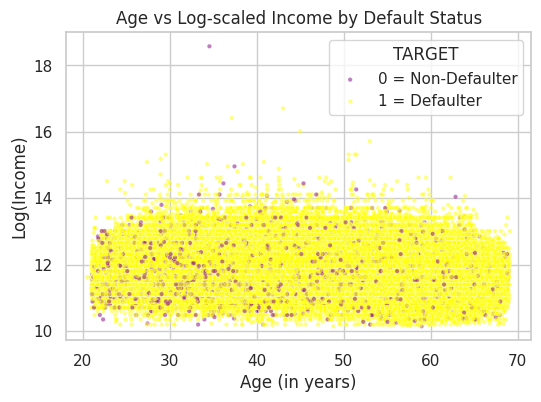

In [317]:
#First, the log of the AVG_INCOME_TOTAL is computed:
application_df['Log_Income'] = np.log1p(application_df['AMT_INCOME_TOTAL'])

#plotting a scatter plot here for income, age and target variables

plt.figure(figsize=(6,4))
sns.scatterplot(data=application_df, x='AGE', y='Log_Income', hue='TARGET', palette={0:'yellow', 1:'purple'}, alpha=0.5, s = 10)
plt.title('Age vs Log-scaled Income by Default Status')
plt.xlabel('Age (in years)')
plt.ylabel('Log(Income)')
plt.legend(title='TARGET', labels=['0 = Non-Defaulter', '1 = Defaulter'])
plt.grid(True)
plt.show()


###Interpretation of INCOME vs AGE by TARGET:

This plot visualizes the relationship between applicant age and log of income across default status categories.

Key Observations:

*  Non-defaulters (TARGET = 0) are more densely distributed across all age
and income levels, especially in the mid-to-high income ranges.

*  Defaulters (TARGET = 1) are more concentrated among:
  - Younger applicants (below age 40).
  - Lower income ranges (log(Income) ≈ 10.5 - 12.5, or approx ₹35,000 to ₹2.7 lakhs).

A few high-income defaulters exist but are likely outliers.

Log scaling was applied to handle extreme outliers in the income distribution and better reveal patterns among the bulk of the data.

Insight:

Log transformation helped uncover that younger, lower-income applicants have a higher likelihood of defaulting. This pattern was obscured in the raw income plot due to skewness from extreme high-income values.

###14.2) DAYS_EMPLOYED vs AGE by TARGET

To explore whether younger applicants with shorter employment duration are more likely to default and if therer is a relation between job stability and repayment behaviour.

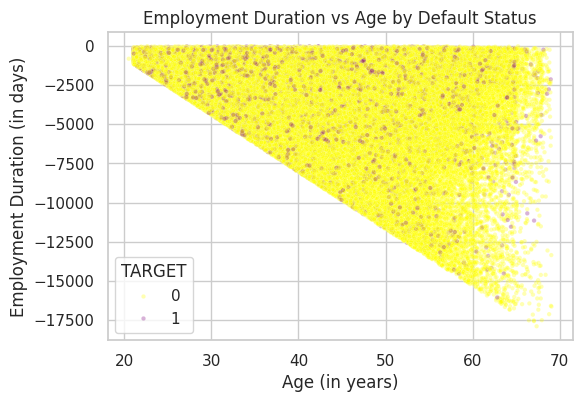

In [318]:
#plotting a scatter plot here for days_employed, age and target variables
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=application_df[application_df['DAYS_EMPLOYED'] < 365243],  # remove anomalies
    x='AGE', y='DAYS_EMPLOYED',
    hue='TARGET',
    alpha=0.3,
    palette=['yellow', 'purple'],
    s=10
)
plt.title('Employment Duration vs Age by Default Status')
plt.xlabel('Age (in years)')
plt.ylabel('Employment Duration (in days)')
plt.grid(True)
plt.show()


###Interpretation of DAYS_EMPLOYED vs AGE by TARGET

*  DAYS_EMPLOYED is negative (days prior to application), so longer employment appears further down the 7-axis.
*  As age increases, employment duration also increases, and older applicants tend to have longer employment histories.
*  Defaulters are more concentrated in the younger age group (around 20s to early 40s) with shorter employment durations (closer to 0).
*  Non-defaulters are spread across all ages but are particulary dense in the older, longer-employed segment.

Insight:

There is a positive correlation between age and employment duration.
Younger applicants with less stable work histories show a higher likelihood of default, while older, consistently employed individuals tend to be more creditworthy.



###14.3) Pairplot of Key Features by TARGET variable

This is useful for visualizing multiple bivariate relationships simultaneously and helping us identify interactions and clustering patterns between top correlated features.

To understand how key features like AGE, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, EXT_SOURCE_2, EXT_SOURCE_3 and num_prev_applications relate to each other and the TARGET variable.

The reason for choosing the columns are as follows:

*   AGE, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE indicates financial patterns.
*   num_prev_applications, approval_ratio and refusal_ratio shows previous credit history behaviours and is a useful engineered feature.
* EXT_SOURCE_2, EXT_SOURCE_3 shows risk assessment correlations
*   TARGET is the label against which the features are being compared.  





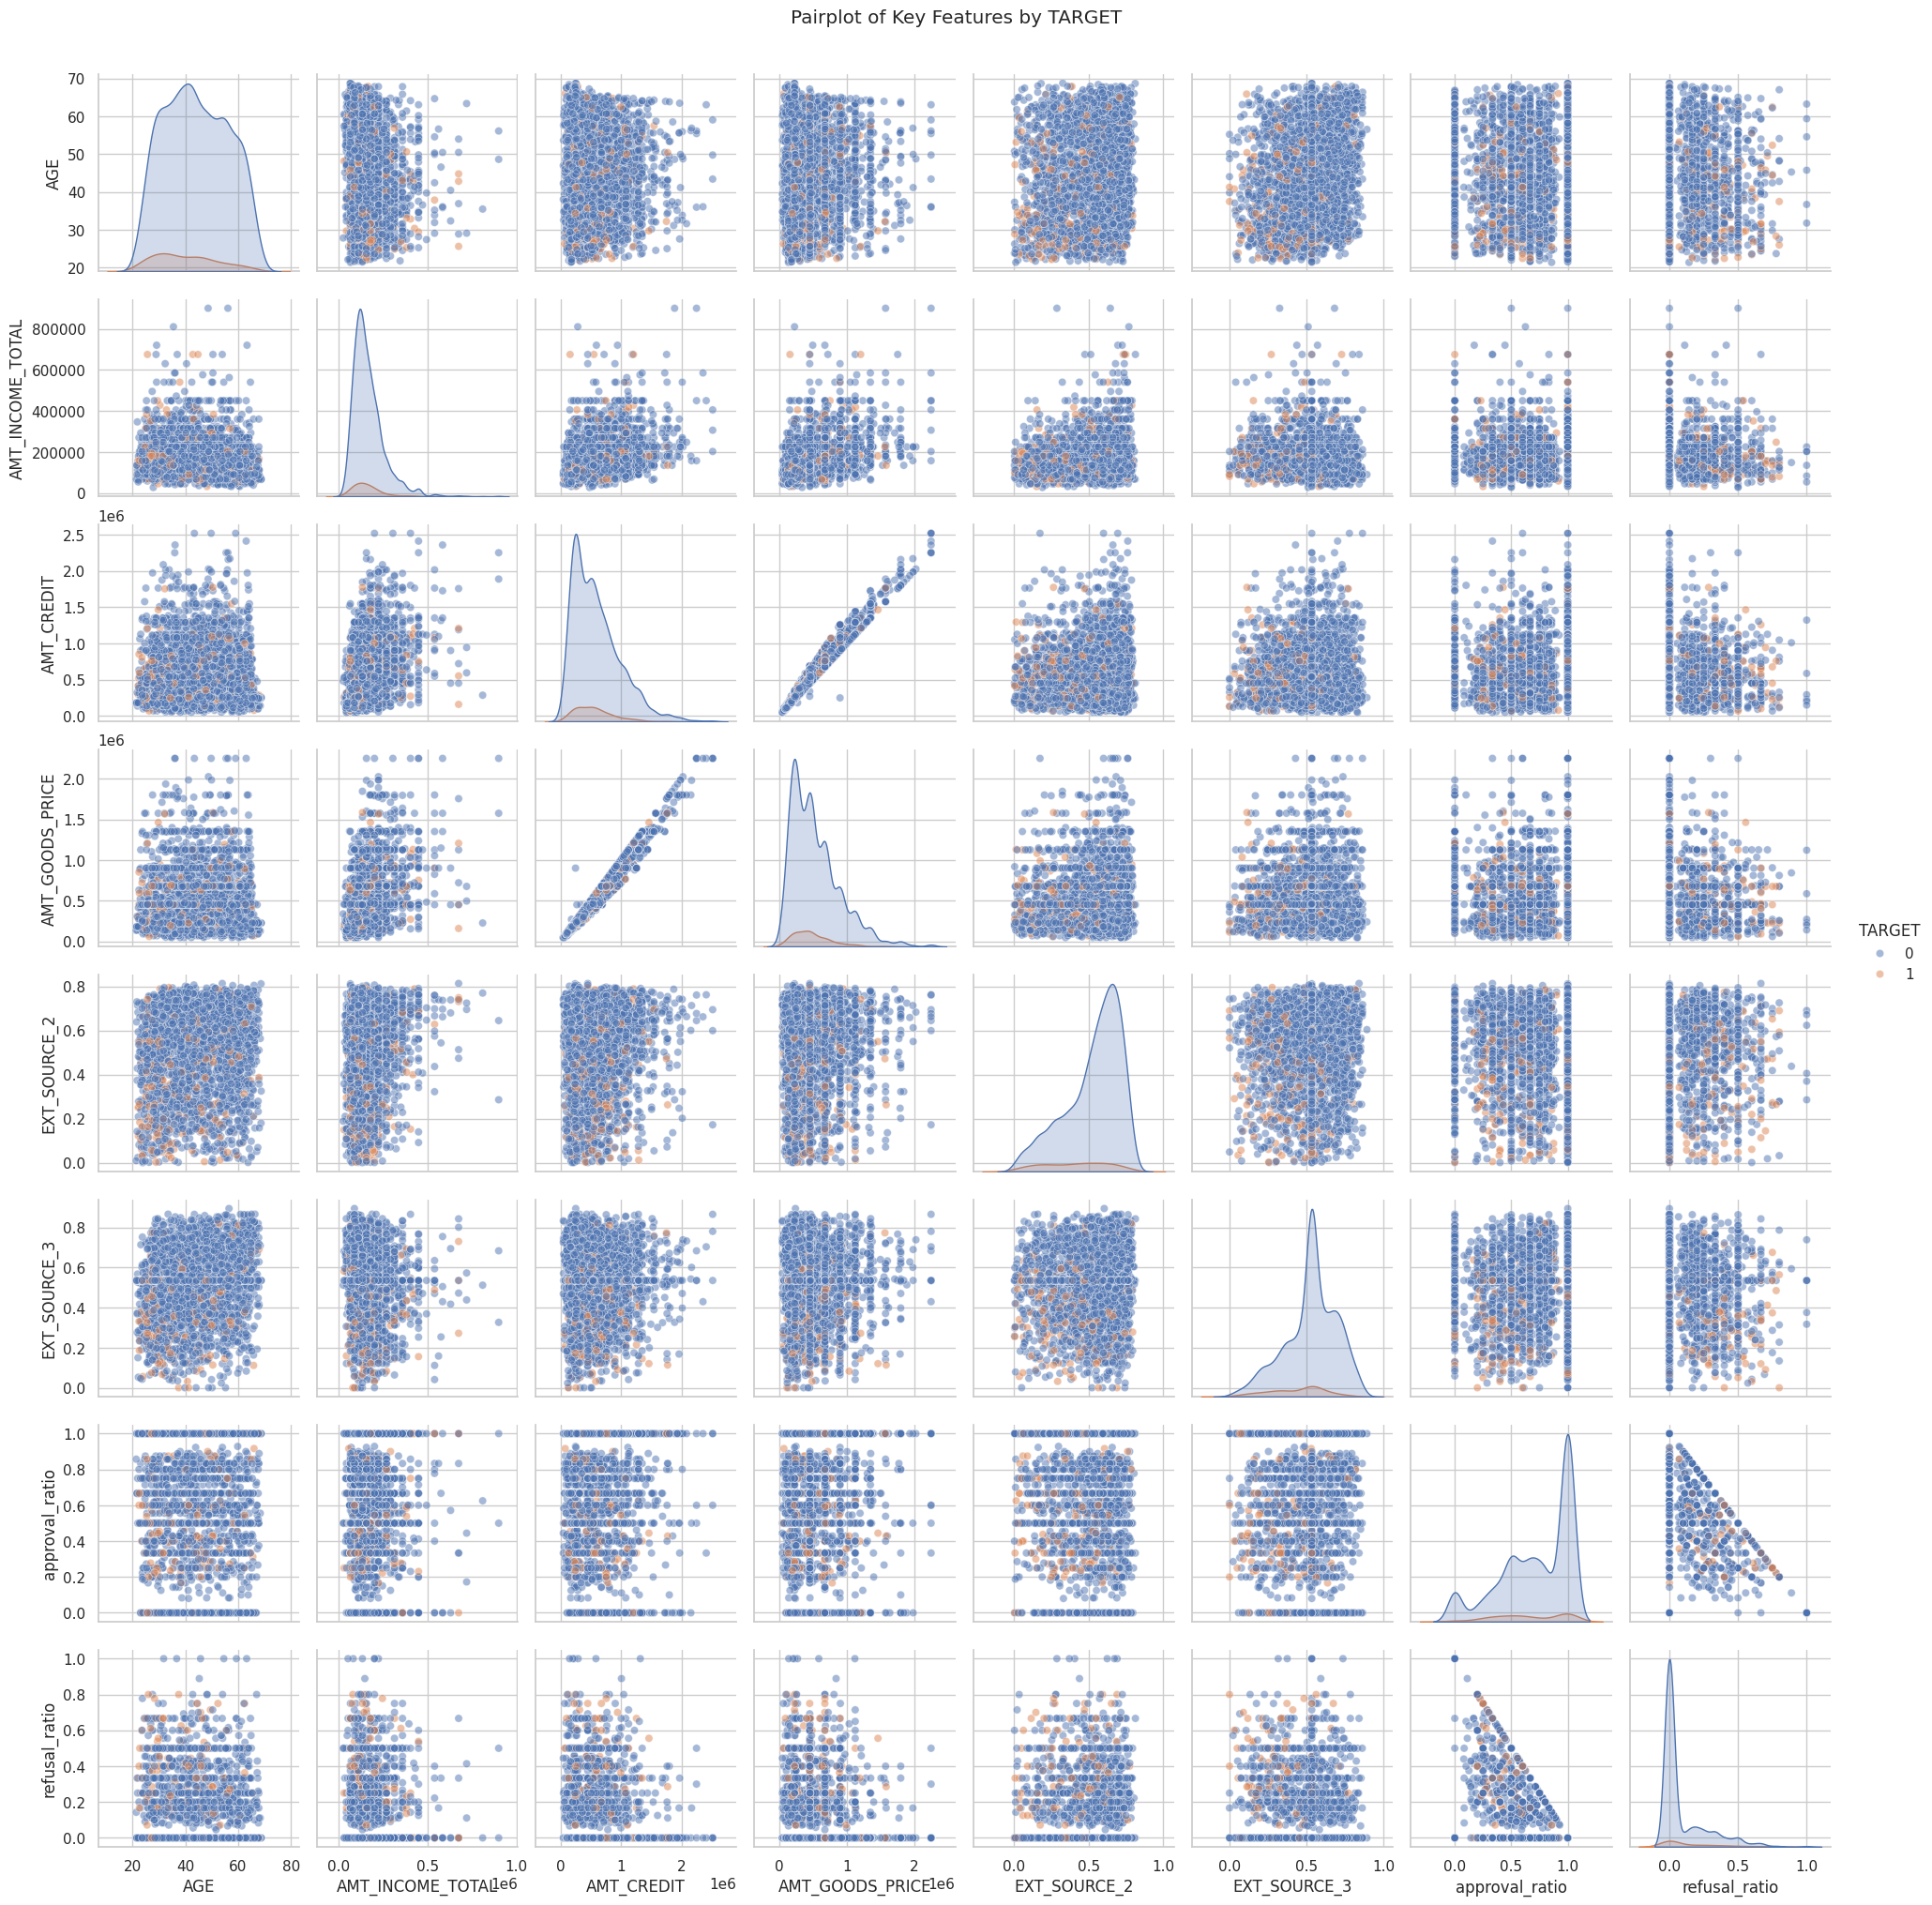

In [319]:
#Plotting the pairplot for the above mentioned key features:

selected_cols = [
    'AGE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
    'EXT_SOURCE_2', 'EXT_SOURCE_3', 'approval_ratio', 'refusal_ratio',
    'TARGET'
]
# Select a sample since the original dataset has more than 300k rows
# This would help to avoid very slow plotting of the graphs and cluttered visuals
# random_state = 43 enure reproducibility of the sample, i.e., we would get the same rows every time we run it
# Dropping missing values only for this plot to avoid performance issues.
sample_df = application_df[selected_cols].dropna().sample(3000, random_state=42)


sns.pairplot(
    sample_df,
    hue='TARGET',
    diag_kind='kde',
    plot_kws={'alpha': 0.5}
)
plt.suptitle('Pairplot of Key Features by TARGET', y=1.02)
plt.show()

###Interpretation of Pairplot of Key Features by TARGET:
The pairrplot explores relationships between key features and how they differ between defaulters and non defaulters:

*   EXT_SOURCE_2 and EXT_SOURCE_3: Exhibit a clear separation where defaulters cluster at lower scores, non-defaulters at higher. These are strong predictors of credit risk.
*   AGE: Defaulters tend to be younger (< 40). Older applicants show a lower default tendency.
*   Approval & Refusal Ratios: Non-defaulters have higher approval and lower refusal rates, reinforcing their creditworthiness.
*   AMT_CREDIT vs AMT_GOODS_PRICE: Strong positive correlation. No distinct separation by TARGET, but defaulters skew slightly toward lower credit.
*   AMT_INCOME_TOTAL: Right-skewed for both groups. Overlap is high — not a strong standalone discriminator.

Insight:

External scores, age, and approval/refusal behavior offer the most useful separation between defaulters and non-defaulters. These should be prioritized for modeling and risk profiling.

##15) HEATMAP Correlation Matrix
Before building predictive models, it's essential to understand how features relate to each other and to the target variable (TARGET). The heatmap helps:
*  Identify strong predictors of default.
*  Detect multicollinearity among features.
*  Guide feature selection and engineering.



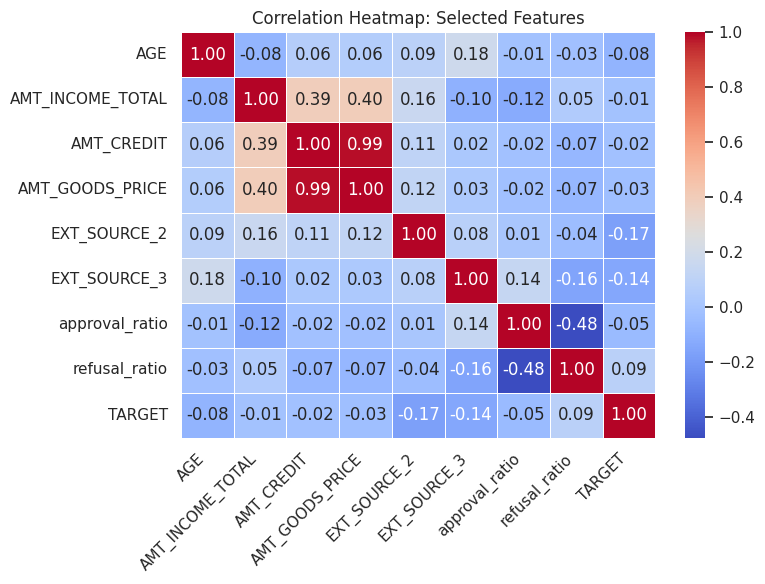

In [320]:

# Sample of relevant columns
selected_cols = [
    'AGE', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
    'EXT_SOURCE_2', 'EXT_SOURCE_3', 'approval_ratio', 'refusal_ratio', 'TARGET'
]

# Sample 5000 rows to reduce computation (simulate same behavior as earlier)
sample_df = application_df[selected_cols].dropna().sample(5000, random_state=42)

# Compute correlation matrix
correlation_matrix = sample_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.xticks(rotation=45, ha ='right')
plt.title('Correlation Heatmap: Selected Features')
plt.tight_layout()
plt.show()

###Interpretation of the heatmap correlation matrix

Top predictors of Default (TARGET)
*   EXT_SOURCE_2: -0.16
*   EXT_SOURCE_3: -0.15
*   AGE: -0.10
Negative correlation means that lower scores or younger age indicates higher default risk.

Highly correlated pairs (indicating potential multicollinearity):
*   AMT_CREDIT and AMT_GOODS_PRICE: 0.99
*   approval ratio and refusal ratio: 0.48

Low collinearity with TARGET:

AMT_INCOME_TOTAL, approval_ratio and refusal_ratio show minimal predictive power on their own.

Insight:

External scores and age remain the strongest independent indicators of default, while highly correlated features should be reviewed for redundancy during modeling.






##16) Final Summary

In this project, we analysed the CREDIT RISK PROJECT, to understand key features influencing loan default risk (TARGET), following a structured path:
1. Univariate Analysis helped identify variable distributions, outliers, and missing values.For example, income and credit amounts had extreme outliers and EXT_SOURCE scores were concentrated in mid-ranges.

2. Categorical vs Target (Bivariate) showed that defaulters were more common among those with lower education, civil marriages, rented housing, and low-skill jobs. Gender also played a role indicating that females had a slightly higher default rate than males.

4. Numerical vs Target (Bivariate) revealed that younger age, shorter employment, and lower EXT_SOURCE scores were clearly associated with higher default rates and that defaulters generally had lower income and bought less expensive goods.

6. Correlation Analysis showed that the strongest negative correlations with TARGET were from EXT_SOURCE_2, EXT_SOURCE_3, and AGE. These features were considered valuable for prediction.

7. Previous Application Data was merged and analyzed shwoing that defaulters had slightly more past applications but lower approval ratios. The approval and refusal ratios gave deeper insight than count alone.

8. Multivariate Analysis showed patterns in which younger, low-income applicants had higher default risk whie pairplots and heatmaps confirmed interaction among income, age, credit amount, and external scores.

